# Artificial Intelligence II: HW2 Solution

## Headers

In [66]:
import pandas as pd
from pandas import read_csv
import numpy as np
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import re
import string
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
nltk.download('stopwords')
import math
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from __future__ import print_function
import scipy
from sklearn.metrics import accuracy_score


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Functions for text preprocessing

In this chapter of the notebook, all functions that are relavent to the method of text cleaning, have been implemented.

### Making words with apostrophes into mutiple words

In [67]:
# Dictionary inspired by https://stackoverflow.com/questions/43018030/replace-apostrophe-short-words-in-python
# Making words with apostrophes into mutiple words 
# More friendly for computer to understand the meaning of the phrase

contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"i'd": "I would",
"i'd've": "I would have",
"i'll": "I will",
"i'll've": "I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": " she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's":  "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

def split_words_with_apostrophe (X):

  # punctuation = '"'
  flag = 0
  row = 0
  for tweet in X:
      flag = 0
      # tweet = tweet.translate(str.maketrans('', '', punctuation))
      for word in tweet.split():
          if word.lower() in contractions:
              flag=1
              tweet = tweet.replace(word, contractions[word.lower()])  
      if flag==1:
          X.loc[row] = tweet
      row += 1
  
  return X


### Main text preprocess



1. Lowercase
2. Remove stopwords 
3. Remove url & twitter usernames
4. Keep only letters
5. Delete multiple consecutive spaces
6. Lemmatize




In [68]:
def remove_stopwords(X):
  my_stopwords = stopwords.words('english')
  flag = 0
  row = 0
  for tweet in X:
      flag = 0
      tweet_tokens = word_tokenize(tweet)
      tokens_without_stopwords = []
      for word in tweet_tokens:
        if word not in my_stopwords: 
          tokens_without_stopwords.append(word)
        else: 
          flag = 1
      filtered_tweet = (" ").join(tokens_without_stopwords)
      if flag==1:
          X.loc[row] = filtered_tweet
      row += 1
  return X


def text_preprocess(X):
  
  # Lowercase
  X = X.apply(lambda x: x.lower())
  
  # Remove stopwords
  # https://stackoverflow.com/questions/19560498/faster-way-to-remove-stop-words-in-python
  pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
  X = X.apply(lambda x: pattern.sub('', x))

  # Remove url
  X = X.apply(lambda x: re.sub(r'http\S+', ' ', x))

  # Remove tweeter usernames
  X = X.apply(lambda x: re.sub('@[^\s]+',' ',x))

  # Remove words with len equals to 1
  X = X.apply(lambda x: re.sub(r'(?:^| )\w(?:$| )', ' ', x).strip())

  # Keep only letters
  X = X.apply(lambda x: re.sub(r'[^a-zA-Z]', ' ', x))

  # Delete multiple consecutive spaces
  X = X.apply(lambda x: ' '.join(x.split()))

  # Lemmatizing teq
  lemmatizer = WordNetLemmatizer()
  X = X.apply(lambda x: ' '.join([lemmatizer.lemmatize(w) for w in x.rstrip().split()]))

  return X

## Defining Feed Forward Neural Network (FFNN) Models
Four different models with 1,2,3, and 5 hidden layers accordingly.

In [69]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# https://medium.com/swlh/sentiment-classification-using-feed-forward-neural-network-in-pytorch-655811a0913f

# Neural network with 1 hidden layer
class FeedForwardNeuralNet0(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim, activation_func, flag):
      super(FeedForwardNeuralNet0, self).__init__()

      # Linear function 1: glove_size --> hidden_dim
      self.fc1 = nn.Linear(input_dim, hidden_dim) 
      # Non-linearity 1
      # self.relu1 = nn.ReLU()
      self.relu1 = activation_func

      # Linear function 2: hidden_dim --> hidden_dim
      self.fc2 = nn.Linear(hidden_dim, hidden_dim)
      # Non-linearity 2
      # self.relu2 = nn.ReLU()
      self.relu2 = activation_func

      # Linear function 3 (readout): hidden_dim --> 3
      self.fc3 = nn.Linear(hidden_dim, output_dim) 

      # If flag is equal to 1 loss function is cross entropy
      self.flag = flag
  
  def forward(self, x):
      # Linear function 1
      out = self.fc1(x)
      # Non-linearity 1
      out = self.relu1(out)

      # Linear function 2
      out = self.fc2(out)
      # Non-linearity 2
      out = self.relu2(out)

      # Linear function 3 (readout)
      out = self.fc3(out)
      
      # Loss function is cross entropy no need to call softmax again
      if self.flag == 1:
        return out
      else:
        return F.softmax(out, dim=1)

# Neural network with 2 hidden layers
class FeedForwardNeuralNet1(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, activation_func, flag):
        super(FeedForwardNeuralNet1, self).__init__()
        
        # Linear function 1: glove_size --> hidden_dim
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = activation_func

        # Linear function 2: hidden_dim --> hidden_dim
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.relu2 = activation_func

        # Linear function 3: hidden_dim --> hidden_dim
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.relu3 = activation_func

        # Linear function 4 (readout): hidden_dim --> 3
        self.fc4 = nn.Linear(hidden_dim, output_dim) 

        # If flag is equal to 1 loss function is cross entropy
        self.flag = flag
        
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)

        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.relu2(out)

        # Linear function 3
        out = self.fc3(out)
        # Non-linearity 3
        out = self.relu3(out)

        # Linear function 4 (readout)
        out = self.fc4(out)
        
        # Loss function is cross entropy no need to call softmax again
        if self.flag == 1:
          return out
        else:
          return F.softmax(out, dim=1)

# Neural network with 3 hidden layers
class FeedForwardNeuralNet2(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, activation_func, flag):
      super(FeedForwardNeuralNet2, self).__init__()
      
      # Linear function 1: glove_size --> hidden_dim
      self.fc1 = nn.Linear(input_dim, hidden_dim) 
      # Non-linearity 1
      self.relu1 = activation_func

      # Linear function 2: hidden_dim --> hidden_dim
      self.fc2 = nn.Linear(hidden_dim, hidden_dim)
      # Non-linearity 2
      self.relu2 = activation_func

      # Linear function 3: hidden_dim --> hidden_dim
      self.fc3 = nn.Linear(hidden_dim, hidden_dim)
      # Non-linearity 3
      self.relu3 = activation_func

      # Linear function 4: hidden_dim --> hidden_dim
      self.fc4 = nn.Linear(hidden_dim, hidden_dim)
      # Non-linearity 4
      self.relu4 = activation_func

      # Linear function 5 (readout): hidden_dim --> 3
      self.fc5 = nn.Linear(hidden_dim, output_dim) 

      # If flag is equal to 1 loss function is cross entropy
      self.flag = flag

    def forward(self, x):
      # Linear function 1
      out = self.fc1(x)
      # Non-linearity 1
      out = self.relu1(out)

      # Linear function 2
      out = self.fc2(out)
      # Non-linearity 2
      out = self.relu2(out)

      # Linear function 3
      out = self.fc3(out)
      # Non-linearity 3
      out = self.relu3(out)

      # Linear function 4
      out = self.fc4(out)
      # Non-linearity 4
      out = self.relu4(out)

      # Linear function 5 (readout)
      out = self.fc5(out)
      
      # Loss function is cross entropy no need to call softmax again
      if self.flag == 1:
        return out
      else:
        return F.softmax(out, dim=1)

# Neural network with 5 hidden layers
class FeedForwardNeuralNet3(nn.Module):
  def __init__(self, input_dim, hidden_dim, output_dim, activation_func, flag):
      super(FeedForwardNeuralNet3, self).__init__()
      
      # Linear function 1: glove_size --> hidden_dim
      self.fc1 = nn.Linear(input_dim, hidden_dim) 
      # Non-linearity 1
      self.relu1 = activation_func

      # Linear function 2: hidden_dim --> hidden_dim
      self.fc2 = nn.Linear(hidden_dim, hidden_dim)
      # Non-linearity 2
      self.relu2 = activation_func

      # Linear function 3: hidden_dim --> hidden_dim
      self.fc3 = nn.Linear(hidden_dim, hidden_dim)
      # Non-linearity 3
      self.relu3 = activation_func

      # Linear function 4: hidden_dim --> hidden_dim
      self.fc4 = nn.Linear(hidden_dim, hidden_dim)
      # Non-linearity 4
      self.relu4 = activation_func

      # Linear function 5: hidden_dim --> hidden_dim
      self.fc5 = nn.Linear(hidden_dim, hidden_dim)
      # Non-linearity 5
      self.relu5 = activation_func

      # Linear function 6: hidden_dim --> hidden_dim
      self.fc6 = nn.Linear(hidden_dim, hidden_dim)
      # Non-linearity 6
      self.relu6 = activation_func

      # Linear function 7 (readout): hidden_dim --> 3
      self.fc7 = nn.Linear(hidden_dim, output_dim) 

      # If flag is equal to 1 loss function is cross entropy
      self.flag = flag

  def forward(self, x):
      # Linear function 1
      out = self.fc1(x)
      # Non-linearity 1
      out = self.relu1(out)

      # Linear function 2
      out = self.fc2(out)
      # Non-linearity 2
      out = self.relu2(out)

      # Linear function 3
      out = self.fc3(out)
      # Non-linearity 3
      out = self.relu3(out)

      # Linear function 4
      out = self.fc4(out)
      # Non-linearity 4
      out = self.relu4(out)

      # Linear function 5
      out = self.fc5(out)
      # Non-linearity 5
      out = self.relu5(out)

      # Linear function 6
      out = self.fc6(out)
      # Non-linearity 6
      out = self.relu6(out)

      # Linear function 7 (readout)
      out = self.fc7(out)
      
      # Loss function is cross entropy no need to call softmax again
      if self.flag == 1:
        return out
      else:
        return F.softmax(out, dim=1)

## Generating input (TF-IDF, Glove) and output (target) tensor

In [70]:
def create_tfidf_vectorizer(X_train, X_validation, X_test):
  tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=5, max_features=10000)
  
  if X_test == None:
    tfidf_train = tfidf_vectorizer.fit_transform(X_train)
    tfidf_train = torch.tensor(scipy.sparse.csr_matrix.todense(tfidf_train)).float()  
    tfidf_validation = tfidf_vectorizer.transform(X_validation)
    tfidf_validation = torch.tensor(scipy.sparse.csr_matrix.todense(tfidf_validation)).float()
    return tfidf_train, tfidf_validation
  else:
    tfidf_test = tfidf_vectorizer.transform(X_test)
    tfidf_test = torch.tensor(scipy.sparse.csr_matrix.todense(tfidf_test)).float()
    return tfidf_test


In [71]:
def create_embedding_matrix(tweet,embedding_dict,dimension):
  index = 0
  tweet_tokens = word_tokenize(tweet)
  embedding_matrix=np.zeros((len(tweet_tokens),dimension))
  for word in tweet_tokens:
    if word in embedding_dict:
      embedding_matrix[index]=embedding_dict[word]
      index += 1
  
  mean_embedding_matrix = np.zeros((1, dimension))
  mean_embedding_matrix = np.mean(embedding_matrix, axis = 0)
  
  mean_embedding_matrix_scaled = np.zeros((1, dimension))
  mean_embedding_matrix_scaled[:] = (mean_embedding_matrix - mean_embedding_matrix.min()) / (mean_embedding_matrix.max() - mean_embedding_matrix.min()) 

  return torch.from_numpy(mean_embedding_matrix)


In [72]:
def make_target(label):
  if label == 0:
    return torch.tensor([1, 0, 0])
  elif label == 1:
    return torch.tensor([0, 1, 0])
  else:
    return torch.tensor([0, 0, 1])

In [73]:
def one_hot_reverse_matrix(data):
  data_size = data.shape[0] 
  # reshaped_data = torch.empty(size=(data_size, 1))
  reshaped_data = torch.ones(data_size)
  for i in range(data_size):
      if torch.equal(data[i], torch.tensor([1., 0., 0.])):
        reshaped_data[i] = torch.tensor([0.])
      elif torch.equal(data[i], torch.tensor([0., 1., 0.])):
        reshaped_data[i] = torch.tensor([1.])
      else:
        reshaped_data[i] = torch.tensor([2.])
  return reshaped_data

## Reading process

### Reading Glove data

In [7]:
!wget https://nlp.stanford.edu/data/glove.twitter.27B.zip
!unzip glove.twitter.27B.zip

--2021-12-23 12:02:43--  https://nlp.stanford.edu/data/glove.twitter.27B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip [following]
--2021-12-23 12:02:43--  http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520408563 (1.4G) [application/zip]
Saving to: ‘glove.twitter.27B.zip’

glove.twitter.27B.z 100%[===================>]   1.42G  5.05MB/s    in 4m 47s  

2021-12-23 12:07:30 (5.05 MB/s) - ‘glove.twitter.27B.zip’ saved [1520408563/1520408563]

Archive:  glove.twitter.27B.zip
  inflating: glove.twitter.27B.2

In [27]:
glove = pd.read_csv('glove.twitter.27B.200d.txt', sep=" ", quoting=3, header=None, index_col=0)
glove_embedding = {key: val.values for key, val in glove.T.items()}
embedding_size = list(glove_embedding.values())[0].shape[0]

### Reading train and validation data

<b>NOTE!</b> In order to run the cell below, firstly you have to do the following: 

1.   Create a folder with the name ```Vaccine Sentiment Dataset```.
2.   Upload under that location the files ```vaccine_train_set.csv```, and ```vaccine_validation_set.csv```.

Besides reading in this cell we preprocess and save in ternsors our data...

In [11]:
# import warnings
# warnings.filterwarnings('ignore')

# Reading vaccine train set and validation set
train_set = pd.read_csv("./Vaccine Sentiment Dataset/vaccine_train_set.csv")
validation_set = pd.read_csv("./Vaccine Sentiment Dataset/vaccine_validation_set.csv")

# Check for null values
# In this case there are no missing values, so no action is needed
if train_set.isnull().values.any()==False and train_set.isnull().values.any()==False:
  print("No missing values in our datasets!\n")  
else:
  train_set = train_set.fillna(0)
  validation_set = validation_set.fillna(0)

# Separate features (inputs) from targets (outputs)
X_train = train_set['tweet'] 
Y_train = train_set['label'].to_numpy().astype('int')
X_validation = validation_set['tweet'] 
Y_validation = validation_set['label'].to_numpy().astype('int')

# Preprocess train set  
X_train = split_words_with_apostrophe(X_train)
X_train = text_preprocess(X_train)

# Preprocess validation set 
X_validation = split_words_with_apostrophe(X_validation)
X_validation = text_preprocess(X_validation)

# Saving in tensors for train set (Glove Model)
train_size = X_train.shape[0]
X_train_tensor = torch.empty(size=(train_size, embedding_size))
Y_train_tensor = torch.empty(size=(train_size, 3))
for i in range(train_size):
    X_train_tensor[i] = create_embedding_matrix(X_train[i],embedding_dict=glove_embedding,dimension=embedding_size)
for i in range(train_size):
    Y_train_tensor[i] = make_target(Y_train[i])

# Saving in tensors for validation set  (Glove Model)
validation_size = X_validation.shape[0] 
X_validation_tensor = torch.empty(size=(validation_size, embedding_size))
Y_validation_tensor = torch.empty(size=(validation_size, 3))
for i in range(validation_size):
    X_validation_tensor[i] = create_embedding_matrix(X_validation[i],embedding_dict=glove_embedding,dimension=embedding_size)
for i in range(validation_size):
    Y_validation_tensor[i] = make_target(Y_validation[i])


X_train_tensor_tfidf, X_validation_tensor_tfidf = create_tfidf_vectorizer(X_train, X_validation, None)
tfidf_size = X_train_tensor_tfidf.shape[1]


No missing values in our datasets!



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
print("Train Stats---\nLabel 0:", np.count_nonzero(Y_train == 0), "samples")
print("Label 1:", np.count_nonzero(Y_train == 1), "samples")
print("Label 2:", np.count_nonzero(Y_train == 2), "samples")

print("\nValidation Stats---\nLabel 0:", np.count_nonzero(Y_validation == 0), "samples")
print("Label 1:", np.count_nonzero(Y_validation == 1), "samples")
print("Label 2:", np.count_nonzero(Y_validation == 2), "samples")


Train Stats---
Label 0: 7458 samples
Label 1: 2073 samples
Label 2: 6445 samples

Validation Stats---
Label 0: 1065 samples
Label 1: 296 samples
Label 2: 921 samples


## Train and validate FFNN Model

In [55]:
import torch
torch.manual_seed(0)

# Train and validate our ffnn model
def train_and_validate(model, vectorizer, loss_func, optim, num_epochs, flag):

  train_losses, total_train_loses = [], []
  train_precision_scores, total_train_precision_scores = [], []
  train_f1_scores, total_train_f1_scores = [], []
  train_recall_scores, total_train_recall_scores = [], []
  train_acc, total_train_acc = [], []

  validation_losses, total_validation_loses = [], []
  validation_precision_scores, total_validation_precision_scores = [], []
  validation_f1_scores, total_validation_f1_scores = [], []
  validation_recall_scores, total_validation_recall_scores = [], []
  validation_acc, total_validation_acc = [], []

  validation_predictions = np.empty((0, 3))

  # Choose vectorizer (TF-IDF or Glove)
  if vectorizer == 'TF-IDF': 
    dataset_train = torch.utils.data.TensorDataset(X_train_tensor_tfidf, Y_train_tensor)
    dataset_validation = torch.utils.data.TensorDataset(X_validation_tensor_tfidf, Y_validation_tensor)
  else: # Glove embedding case
    dataset_train = torch.utils.data.TensorDataset(X_train_tensor, Y_train_tensor)
    dataset_validation = torch.utils.data.TensorDataset(X_validation_tensor, Y_validation_tensor)

  dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=128, shuffle=True)
  dataloader_validation = torch.utils.data.DataLoader(dataset_validation, batch_size=128, shuffle=False)

  for epoch in range(num_epochs):
    train_losses, train_precision_scores, train_f1_scores, train_recall_scores, train_acc = [], [], [], [], []
    validation_losses, validation_precision_scores, validation_f1_scores, validation_recall_scores, validation_acc = [], [], [], [], []

    # Train model
    for x_batch, y_batch in dataloader_train:
      y_pred = model(x_batch)

      # Calcualte loss of train data
      if isinstance(loss_func, torch.nn.modules.loss.CrossEntropyLoss) == True:
        loss = loss_func(y_pred, one_hot_reverse_matrix(y_batch).type(torch.LongTensor))
      else:
        loss = loss_func(y_pred, y_batch)
      train_losses.append(loss.item())

      optim.zero_grad() #Delete previously stored gradients
      loss.backward() #Perform backpropagation starting from the loss calculated in this epoch
      optim.step() #Update model's weights based on the gradients calculated during backprop

      # Reshape predicted and true labels
      # This convertion is necessary for the scoring functions
      y_pred = torch.argmax(y_pred, dim=1).numpy().reshape(-1,1)
      y_batch = torch.argmax(y_batch, dim=1).numpy().reshape(-1,1)
      
      # Calculate scores of train data

      score = precision_score(y_batch, y_pred, average='weighted', zero_division=1)
      train_precision_scores.append(score)
      
      score = f1_score(y_batch, y_pred, average='weighted', zero_division=1)
      train_f1_scores.append(score)
      
      score = recall_score(y_batch, y_pred, average='weighted', zero_division=1)
      train_recall_scores.append(score)

      acc = accuracy_score(y_batch, y_pred)
      train_acc.append(acc)

    # Validate model
    for x_batch, y_batch in dataloader_validation:
      y_pred = model(x_batch)

      # Calculate loss of validation data
      if isinstance(loss_func, torch.nn.modules.loss.CrossEntropyLoss) == True:
        loss = loss_func(y_pred, one_hot_reverse_matrix(y_batch).type(torch.LongTensor))
      else:
        loss = loss_func(y_pred, y_batch)
      validation_losses.append(loss.item())

      if epoch == num_epochs - 1:
        validation_predictions=np.concatenate((validation_predictions,y_pred.detach().numpy()))

      y_pred = torch.argmax(y_pred, dim=1).numpy().reshape(-1,1)
      y_batch = torch.argmax(y_batch, dim=1).numpy().reshape(-1,1)

      # Calculate scores of validation data

      score = precision_score(y_batch, y_pred, average='weighted', zero_division=1)
      validation_precision_scores.append(score)
      
      score = f1_score(y_batch, y_pred, average='weighted', zero_division=1)
      validation_f1_scores.append(score)
      
      score = recall_score(y_batch, y_pred, average='weighted', zero_division=1)
      validation_recall_scores.append(score)

      acc = accuracy_score(y_batch, y_pred)
      validation_acc.append(acc)
    
    # Add train scores to corresponding lists
    total_train_loses.append(sum(train_losses)/len(dataloader_train))
    total_train_precision_scores.append(sum(train_precision_scores)/len(dataloader_train))
    total_train_f1_scores.append(sum(train_f1_scores)/len(dataloader_train))
    total_train_recall_scores.append(sum(train_recall_scores)/len(dataloader_train))
    total_train_acc.append(sum(train_acc)/len(dataloader_train))

    # Add validation scores to corresponding lists
    total_validation_loses.append(sum(validation_losses)/len(dataloader_validation))
    total_validation_precision_scores.append(sum(validation_precision_scores)/len(dataloader_validation))
    total_validation_f1_scores.append(sum(validation_f1_scores)/len(dataloader_validation))
    total_validation_recall_scores.append(sum(validation_recall_scores)/len(dataloader_validation))
    total_validation_acc.append(sum(validation_acc)/len(dataloader_validation))

    # print(f"Epoch {epoch:3}:   Train Loss = {sum(train_losses)/len(dataloader_train):.5f},   Train F1 Score = {sum(train_f1_scores)/len(dataloader_train):.5f},   Validation Loss = {sum(validation_losses)/len(dataloader_validation):.5f},   Validation F1 Score = {sum(validation_f1_scores)/len(dataloader_validation):.5f}")
    # print(f"Epoch {epoch:3}:   Train Loss = {sum(train_losses)/len(dataloader_train):.5f},   Train Prec Score = {sum(train_precision_scores)/len(dataloader_train):.5f},   Validation Loss = {sum(validation_losses)/len(dataloader_validation):.5f},   Validation Prec Score = {sum(validation_precision_scores)/len(dataloader_validation):.5f}")
    # print(f"Epoch {epoch:3}:   Train Loss = {sum(train_losses)/len(dataloader_train):.5f},   Train F1 Score = {sum(train_acc)/len(dataloader_train):.5f},   Validation Loss = {sum(validation_losses)/len(dataloader_validation):.5f},   Validation F1 Score = {sum(validation_acc)/len(dataloader_validation):.5f}")

  # print(u'\u2500' * 123)
  print("Train Precision Score =", '{:.5}'.format(sum(train_precision_scores)/len(dataloader_train)))
  print("Train F1 Score =", '{:.5}'.format(sum(train_f1_scores)/len(dataloader_train)))
  print("Train Recall Score =", '{:.5}'.format(sum(train_recall_scores)/len(dataloader_train)))
  print(u'\u2500' * 123)
  print("Validation Precision Score =", '{:.5}'.format(sum(validation_precision_scores)/len(dataloader_validation)))
  print("Validation F1 Score =", '{:.5}'.format(sum(validation_f1_scores)/len(dataloader_validation)))
  print("Validation Recall Score =", '{:.5}'.format(sum(validation_recall_scores)/len(dataloader_validation)))
  print("\n")

  # print(u'\u2500' * 123, "\n")

  make_plots([i for i in range(num_epochs)], total_train_loses, total_train_f1_scores, total_validation_loses, total_validation_f1_scores)
  # make_plots([i for i in range(num_epochs)], total_train_loses, total_train_precision_scores, total_validation_loses, total_validation_precision_scores)
  # make_plots([i for i in range(num_epochs)], total_train_loses, total_train_acc, total_validation_loses, total_validation_acc)

  # Roc curve plot only for best model
  if flag == 1:
    print("\n")
    make_roc_curve(validation_predictions,Y_validation_tensor.numpy())

## Custom GridSearch function

In [58]:

# Grid function that iterates through different parameters, and for each model outputs some scores and plots
def myGridSearch(vectorizers, activation_functions, hidden_layers, loss_functions, optimizers, hidden_dimensions, learning_rates, flag):
  grid_counter = 0
  output_dim = 3

  for vectorizer in vectorizers: # Iterate through vectorizers
    for activation_func in activation_functions: # Iterate through activation functions
      for hidden_dim in hidden_dimensions: # Iterate through hidden dimensions of each layer
        for hidden_layer in hidden_layers: # Iterate through hidden layers
          for learning_rate in learning_rates: # Iterate through learning rates
            for loss_func in loss_functions: # Iterate through loss functions      
              for optimizer in optimizers: # Iterate through optimizers

                # Initialize input dimension of model
                if vectorizer == 'TF-IDF':
                  input_dim = tfidf_size
                else: # Glove Embedding case
                  input_dim = embedding_size

                # If cross entropy loss is used inform ffnn not to call softmax again
                if isinstance(loss_func, torch.nn.modules.loss.CrossEntropyLoss) == True:
                  # initialize model
                  if hidden_layer == 1:
                    ff_nn_glove_model = FeedForwardNeuralNet0(input_dim, hidden_dim, output_dim, activation_func, 1)   
                  elif hidden_layer == 2:
                    ff_nn_glove_model = FeedForwardNeuralNet1(input_dim, hidden_dim, output_dim, activation_func, 1)
                  elif hidden_layer == 3: # Hidden layer equals to 3
                    ff_nn_glove_model = FeedForwardNeuralNet2(input_dim, hidden_dim, output_dim, activation_func, 1)
                  else: # Hidden layer equals to 4
                    ff_nn_glove_model = FeedForwardNeuralNet3(input_dim, hidden_dim, output_dim, activation_func, 1)
                else:
                  # initialize model
                  if hidden_layer == 1:
                    ff_nn_glove_model = FeedForwardNeuralNet0(input_dim, hidden_dim, output_dim, activation_func, 0)   
                  elif hidden_layer == 2:
                    ff_nn_glove_model = FeedForwardNeuralNet1(input_dim, hidden_dim, output_dim, activation_func, 0)
                  elif hidden_layer == 3: # Hidden layer equals to 3
                    ff_nn_glove_model = FeedForwardNeuralNet2(input_dim, hidden_dim, output_dim, activation_func, 0)
                  else: # Hidden layer equals to 4
                    ff_nn_glove_model = FeedForwardNeuralNet3(input_dim, hidden_dim, output_dim, activation_func, 0)

                # Initialize optimizer
                if optimizer == 'SGD':
                  optim = torch.optim.SGD(ff_nn_glove_model.parameters(), lr=learning_rate)
                elif optimizer == 'Adadelta':
                  optim = torch.optim.Adadelta(ff_nn_glove_model.parameters(), lr=learning_rate)
                else:
                  optim = torch.optim.Adam(ff_nn_glove_model.parameters(), lr=learning_rate)

                grid_counter += 1

                print()
                print('*' * 123)
                print(' ' * 52, 'Grid Search:', grid_counter)
                print('*' * 123)
                print(vectorizer, "Model", "\nLoss Function:", loss_func, "\nOptimizer:", type (optim), "\nActivation Function:", activation_func, "\nHidden Layers:", hidden_layer, "\nHidden Dimensions:", hidden_dim, "\nLearning Rate:", learning_rate)
                print(u'\u2500' * 123)

                # Train and validate model
                num_epochs = 150
                train_and_validate(ff_nn_glove_model, vectorizer, loss_func, optim, num_epochs , flag)

## Plots and Roc Curve

In [34]:
# Make "loss vs epochs" and "acc vs epochs" plots
def make_plots(num_epochs, train_losses, train_accuracies, validation_losses, validation_accuracies):
  fig, (plt1, plt2) = plt.subplots(1, 2, figsize=(11, 5))
  fig.tight_layout(pad=5.0)
  
  plt1.plot(num_epochs, train_losses, color='blue', label='Training Loss')
  plt1.plot(num_epochs, validation_losses, color='green', label='Validation Loss')
  plt1.set_title('Loss vs Epochs')
  plt1.set_xlabel('Num of Epochs')
  plt1.set_ylabel('Model Loss')
  plt1.legend()
  plt1.grid()
  plt1.legend(loc='lower left')

  plt2.plot(num_epochs, train_accuracies, color='blue', label='Training Accuracy')
  plt2.plot(num_epochs, validation_accuracies, color='green', label='Validation Accuracy')
  plt2.set_title('Accuracy vs Epochs')
  plt2.set_xlabel('Num of Epochs')
  plt2.set_ylabel('Model Accuracy')
  plt2.legend()
  plt2.grid()
  plt2.legend(loc='lower right')

  plt.show()

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Roc curve plot
# https://stackoverflow.com/questions/45641409/computing-scikit-learn-multiclass-roc-curve-with-cross-validation-cv
def make_roc_curve(y_predict , y_real):
    n_classes = y_real.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_real[:, i], y_predict[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = ['blue', 'red', 'green']
    plt.figure(figsize=[11,5])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    
    plt.show()

## Experimenting

We'll start experimenting with our 2 main models. The first model uses <b>GloVe</b> as a word vector technique and the second a <b>TF-IDF</b> vectorizer.
For each model, we'll experiment with the following hyperparameters:


*   Number of hidden layers and number of their units
*   Activation functions
*   Loss functions
*   Optimizers
*   Learning rates



### First Model (GloVe)

#### Hidden layers, learning rates, hidden dimensions

Firstly experimenting with different hidden layers, learning rates and hidden dimensions to see how these changes can affect the ffnn... 
* With the smallest learning rate (0.0001) we get the most balanced results, according to accuracies and plots. 

* With higher learning rate, hidden dimensions and more hidden layers we can observe that our model starts overfitting. Usually at this point, accuracy of validation is at its best, and train accuracy keeps getting better.


***************************************************************************************************************************
                                                     Grid Search: 1
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 200 
Learning Rate: 0.01
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.75257,   Train F1 Score = 0.63181,   Validation Loss = 0.71311,   Validation F1 Score = 0.65668
Epoch   1:   Train Loss = 0.68491,   Train F1 Score = 0.69007,   Validation Loss = 0.68794,   Validation F1 Score = 0.68734
Epoch   2:   Train Loss = 0.65222,   Train F1 Score = 0.71180,   Validation Loss = 0.71577,   Validation F1 Score = 0.69417
Epoc

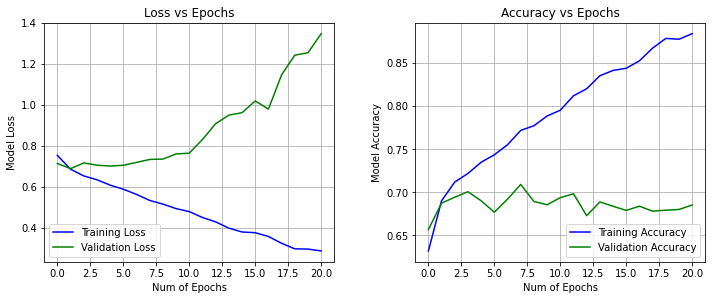


***************************************************************************************************************************
                                                     Grid Search: 2
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 200 
Learning Rate: 0.001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.79419,   Train F1 Score = 0.59476,   Validation Loss = 0.71980,   Validation F1 Score = 0.65047
Epoch   1:   Train Loss = 0.70077,   Train F1 Score = 0.66893,   Validation Loss = 0.69894,   Validation F1 Score = 0.67493
Epoch   2:   Train Loss = 0.67064,   Train F1 Score = 0.69606,   Validation Loss = 0.67609,   Validation F1 Score = 0.69288
Epo

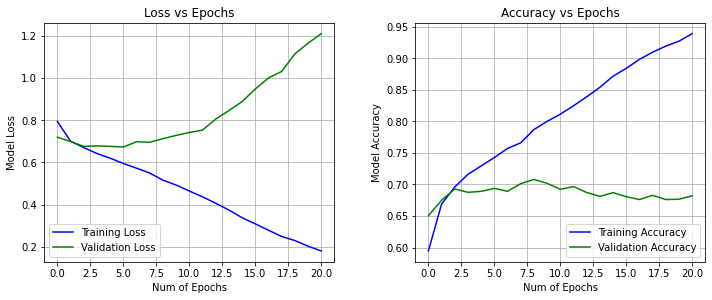


***************************************************************************************************************************
                                                     Grid Search: 3
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 200 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 1.01122,   Train F1 Score = 0.43085,   Validation Loss = 0.93389,   Validation F1 Score = 0.49140
Epoch   1:   Train Loss = 0.86140,   Train F1 Score = 0.58492,   Validation Loss = 0.81089,   Validation F1 Score = 0.59947
Epoch   2:   Train Loss = 0.78161,   Train F1 Score = 0.61228,   Validation Loss = 0.76989,   Validation F1 Score = 0.60796
Ep

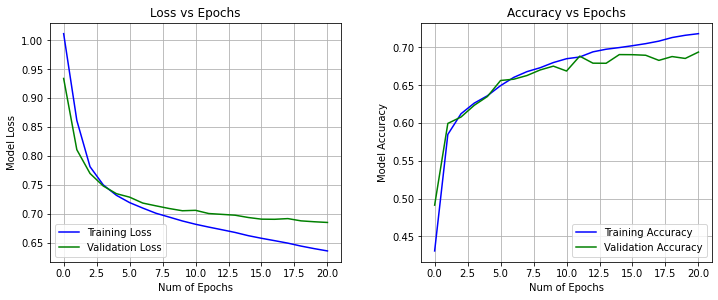


***************************************************************************************************************************
                                                     Grid Search: 4
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 3 
Hidden Dimensions: 200 
Learning Rate: 0.01
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.77658,   Train F1 Score = 0.59865,   Validation Loss = 0.71350,   Validation F1 Score = 0.62480
Epoch   1:   Train Loss = 0.70493,   Train F1 Score = 0.67070,   Validation Loss = 0.71172,   Validation F1 Score = 0.67241
Epoch   2:   Train Loss = 0.67767,   Train F1 Score = 0.69326,   Validation Loss = 0.70331,   Validation F1 Score = 0.67967
Epoc

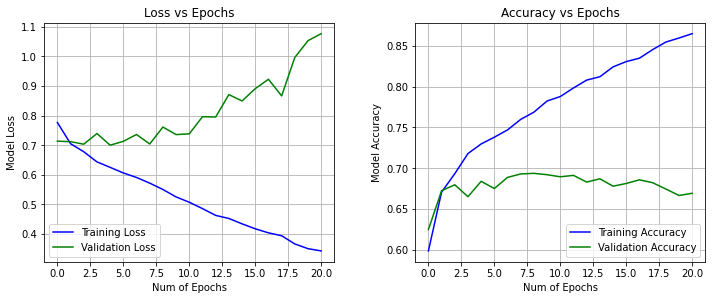


***************************************************************************************************************************
                                                     Grid Search: 5
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 3 
Hidden Dimensions: 200 
Learning Rate: 0.001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.81679,   Train F1 Score = 0.55463,   Validation Loss = 0.73814,   Validation F1 Score = 0.62309
Epoch   1:   Train Loss = 0.70340,   Train F1 Score = 0.66396,   Validation Loss = 0.69210,   Validation F1 Score = 0.68938
Epoch   2:   Train Loss = 0.66446,   Train F1 Score = 0.70276,   Validation Loss = 0.67758,   Validation F1 Score = 0.69592
Epo

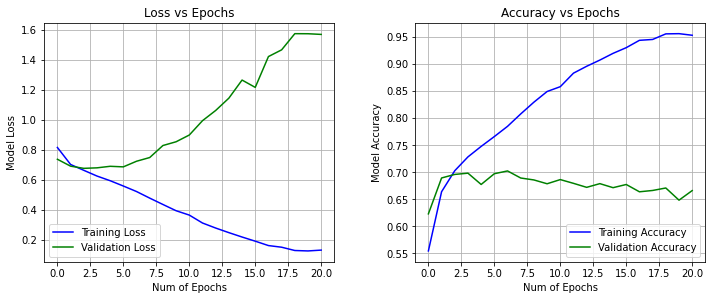


***************************************************************************************************************************
                                                     Grid Search: 6
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 3 
Hidden Dimensions: 200 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 1.02214,   Train F1 Score = 0.26067,   Validation Loss = 0.94112,   Validation F1 Score = 0.29723
Epoch   1:   Train Loss = 0.83401,   Train F1 Score = 0.56762,   Validation Loss = 0.76811,   Validation F1 Score = 0.61510
Epoch   2:   Train Loss = 0.75398,   Train F1 Score = 0.62003,   Validation Loss = 0.74694,   Validation F1 Score = 0.62223
Ep

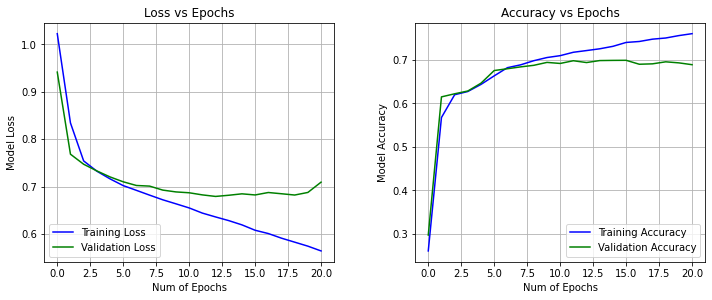


***************************************************************************************************************************
                                                     Grid Search: 7
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 5 
Hidden Dimensions: 200 
Learning Rate: 0.01
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.86843,   Train F1 Score = 0.53444,   Validation Loss = 0.75471,   Validation F1 Score = 0.62164
Epoch   1:   Train Loss = 0.74493,   Train F1 Score = 0.63021,   Validation Loss = 0.73670,   Validation F1 Score = 0.62515
Epoch   2:   Train Loss = 0.71426,   Train F1 Score = 0.64069,   Validation Loss = 0.71515,   Validation F1 Score = 0.65585
Epoc

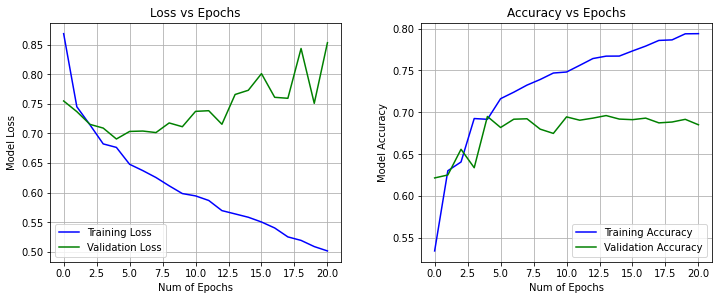


***************************************************************************************************************************
                                                     Grid Search: 8
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 5 
Hidden Dimensions: 200 
Learning Rate: 0.001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.84077,   Train F1 Score = 0.51591,   Validation Loss = 0.73910,   Validation F1 Score = 0.62514
Epoch   1:   Train Loss = 0.70857,   Train F1 Score = 0.65853,   Validation Loss = 0.69820,   Validation F1 Score = 0.68155
Epoch   2:   Train Loss = 0.66526,   Train F1 Score = 0.70910,   Validation Loss = 0.67931,   Validation F1 Score = 0.69165
Epo

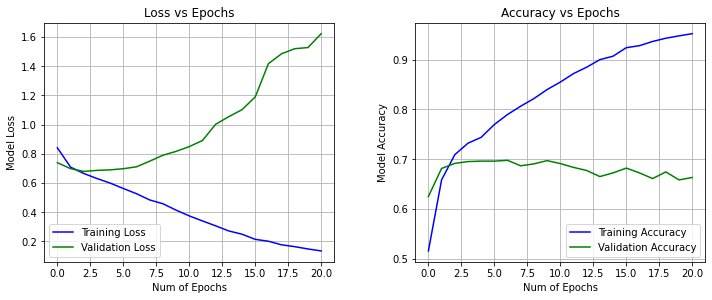


***************************************************************************************************************************
                                                     Grid Search: 9
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 5 
Hidden Dimensions: 200 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 1.02445,   Train F1 Score = 0.26852,   Validation Loss = 0.93955,   Validation F1 Score = 0.29723
Epoch   1:   Train Loss = 0.85068,   Train F1 Score = 0.52119,   Validation Loss = 0.78302,   Validation F1 Score = 0.60893
Epoch   2:   Train Loss = 0.75833,   Train F1 Score = 0.61953,   Validation Loss = 0.74722,   Validation F1 Score = 0.62339
Ep

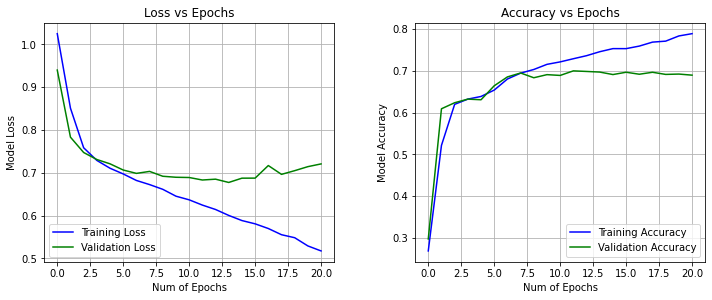


***************************************************************************************************************************
                                                     Grid Search: 10
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 400 
Learning Rate: 0.01
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.75457,   Train F1 Score = 0.62635,   Validation Loss = 0.73377,   Validation F1 Score = 0.64519
Epoch   1:   Train Loss = 0.68214,   Train F1 Score = 0.68797,   Validation Loss = 0.71188,   Validation F1 Score = 0.67212
Epoch   2:   Train Loss = 0.65101,   Train F1 Score = 0.71086,   Validation Loss = 0.69453,   Validation F1 Score = 0.69234
Epo

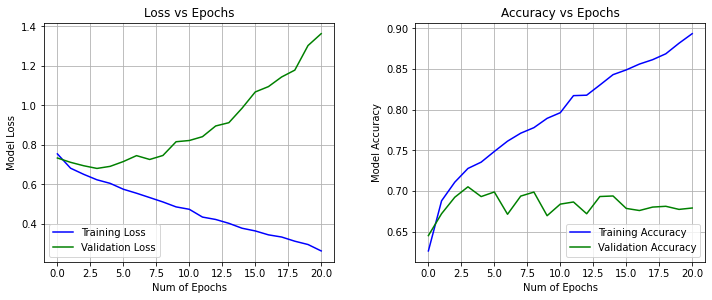


***************************************************************************************************************************
                                                     Grid Search: 11
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 400 
Learning Rate: 0.001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.78285,   Train F1 Score = 0.59793,   Validation Loss = 0.71526,   Validation F1 Score = 0.66261
Epoch   1:   Train Loss = 0.69003,   Train F1 Score = 0.67713,   Validation Loss = 0.69237,   Validation F1 Score = 0.67858
Epoch   2:   Train Loss = 0.64988,   Train F1 Score = 0.71183,   Validation Loss = 0.67858,   Validation F1 Score = 0.69749
Ep

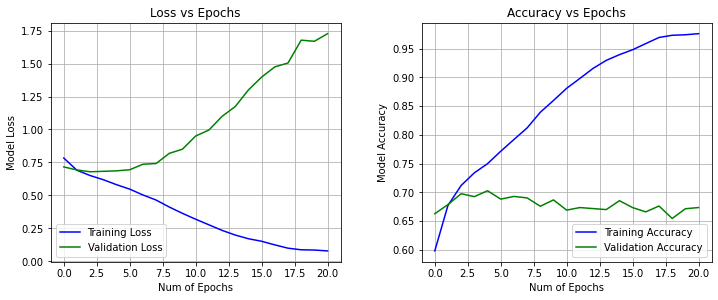


***************************************************************************************************************************
                                                     Grid Search: 12
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 400 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.95432,   Train F1 Score = 0.53021,   Validation Loss = 0.84413,   Validation F1 Score = 0.59068
Epoch   1:   Train Loss = 0.79052,   Train F1 Score = 0.60913,   Validation Loss = 0.76328,   Validation F1 Score = 0.61052
Epoch   2:   Train Loss = 0.74245,   Train F1 Score = 0.62985,   Validation Loss = 0.73411,   Validation F1 Score = 0.63616
E

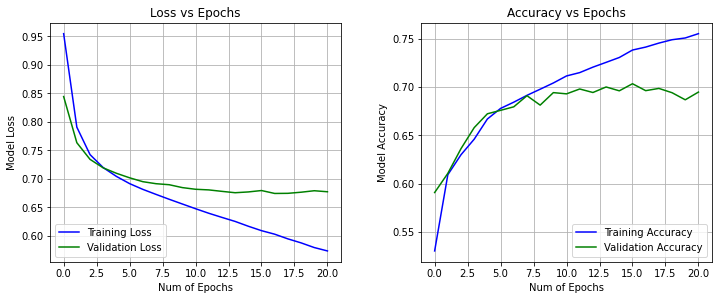


***************************************************************************************************************************
                                                     Grid Search: 13
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 3 
Hidden Dimensions: 400 
Learning Rate: 0.01
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.79656,   Train F1 Score = 0.58774,   Validation Loss = 0.72408,   Validation F1 Score = 0.63188
Epoch   1:   Train Loss = 0.70883,   Train F1 Score = 0.66785,   Validation Loss = 0.70370,   Validation F1 Score = 0.68038
Epoch   2:   Train Loss = 0.67276,   Train F1 Score = 0.70152,   Validation Loss = 0.70502,   Validation F1 Score = 0.67765
Epo

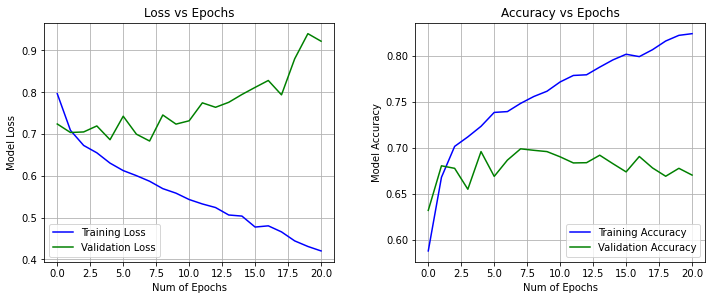


***************************************************************************************************************************
                                                     Grid Search: 14
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 3 
Hidden Dimensions: 400 
Learning Rate: 0.001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.80050,   Train F1 Score = 0.56913,   Validation Loss = 0.71081,   Validation F1 Score = 0.62994
Epoch   1:   Train Loss = 0.69275,   Train F1 Score = 0.67982,   Validation Loss = 0.68480,   Validation F1 Score = 0.69978
Epoch   2:   Train Loss = 0.64815,   Train F1 Score = 0.71582,   Validation Loss = 0.67004,   Validation F1 Score = 0.70017
Ep

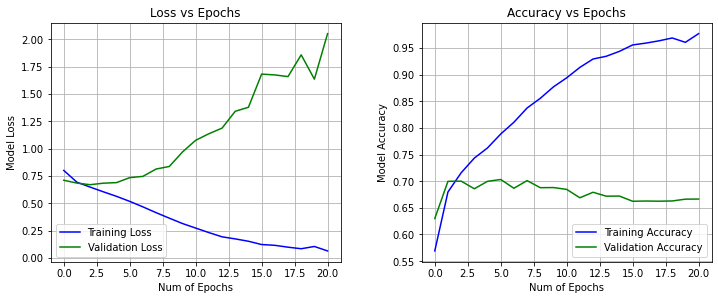


***************************************************************************************************************************
                                                     Grid Search: 15
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 3 
Hidden Dimensions: 400 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.93511,   Train F1 Score = 0.43732,   Validation Loss = 0.78694,   Validation F1 Score = 0.59794
Epoch   1:   Train Loss = 0.75752,   Train F1 Score = 0.61981,   Validation Loss = 0.74619,   Validation F1 Score = 0.62353
Epoch   2:   Train Loss = 0.72234,   Train F1 Score = 0.63533,   Validation Loss = 0.72636,   Validation F1 Score = 0.62760
E

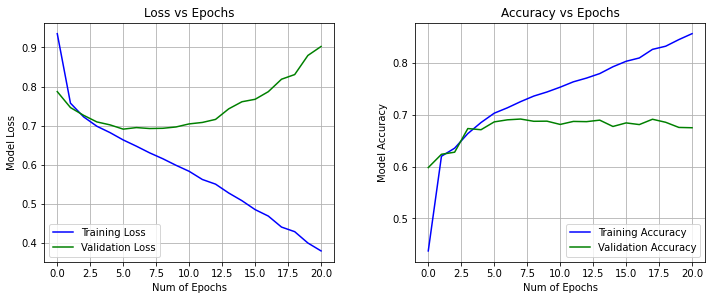


***************************************************************************************************************************
                                                     Grid Search: 16
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 5 
Hidden Dimensions: 400 
Learning Rate: 0.01
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.83675,   Train F1 Score = 0.57445,   Validation Loss = 0.77972,   Validation F1 Score = 0.62759
Epoch   1:   Train Loss = 0.75382,   Train F1 Score = 0.62898,   Validation Loss = 0.74722,   Validation F1 Score = 0.62930
Epoch   2:   Train Loss = 0.73366,   Train F1 Score = 0.64302,   Validation Loss = 0.72108,   Validation F1 Score = 0.67078
Epo

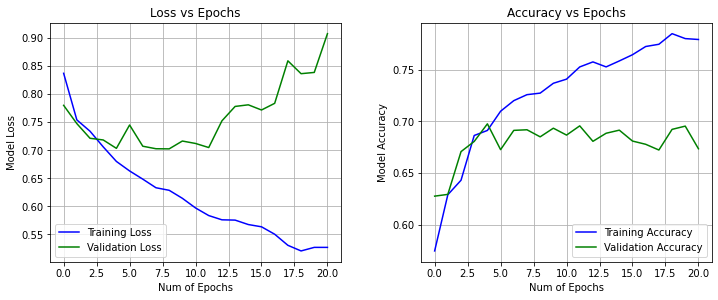


***************************************************************************************************************************
                                                     Grid Search: 17
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 5 
Hidden Dimensions: 400 
Learning Rate: 0.001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.81783,   Train F1 Score = 0.54096,   Validation Loss = 0.72911,   Validation F1 Score = 0.62852
Epoch   1:   Train Loss = 0.70536,   Train F1 Score = 0.65726,   Validation Loss = 0.70254,   Validation F1 Score = 0.69225
Epoch   2:   Train Loss = 0.66391,   Train F1 Score = 0.69958,   Validation Loss = 0.67837,   Validation F1 Score = 0.69776
Ep

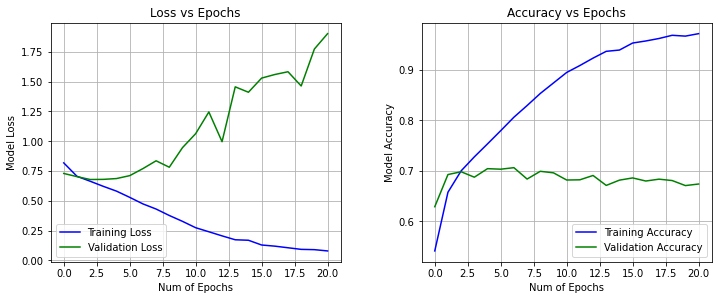


***************************************************************************************************************************
                                                     Grid Search: 18
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 5 
Hidden Dimensions: 400 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.96013,   Train F1 Score = 0.38158,   Validation Loss = 0.80436,   Validation F1 Score = 0.58655
Epoch   1:   Train Loss = 0.76457,   Train F1 Score = 0.61808,   Validation Loss = 0.75029,   Validation F1 Score = 0.62058
Epoch   2:   Train Loss = 0.72960,   Train F1 Score = 0.63036,   Validation Loss = 0.72855,   Validation F1 Score = 0.62810
E

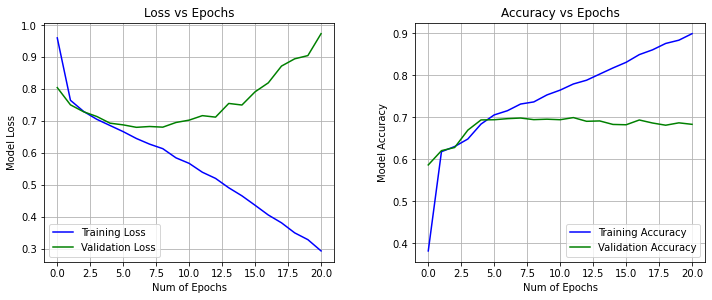

In [ ]:
vectorizers = ['Glove']
activation_functions = [nn.ReLU()]
hidden_layers = [1, 3, 5]
loss_functions = [nn.CrossEntropyLoss()]
optimizers = ['Adam']
hidden_dimensions = [200, 400]
learning_rates = [0.01, 0.001, 0.0001]

myGridSearch(vectorizers, activation_functions, hidden_layers, loss_functions, optimizers, hidden_dimensions, learning_rates, 0)

#### Activation functions, loss functions, optimizers
Based on the following results:
* It seems that hidden layer = 1 again is the best choice. 
* MSE and CrossEntropy loss performed similary to my surprise. I expected CrossEntropy to outperform MSE, because is suitable for classification problems, while MSE is better for regression problems. However, our model performed well for both loss functions.
* Best optimizer option is Adam.
* LeakyReLU and ReLU activation functions perform similarly.


***************************************************************************************************************************
                                                     Grid Search: 1
***************************************************************************************************************************
Glove Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 200 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.20281,   Train F1 Score = 0.45222,   Validation Loss = 0.18227,   Validation F1 Score = 0.56872
Epoch   1:   Train Loss = 0.16662,   Train F1 Score = 0.59531,   Validation Loss = 0.15855,   Validation F1 Score = 0.60955
Epoch   2:   Train Loss = 0.15285,   Train F1 Score = 0.61745,   Validation Loss = 0.15175,   Validation F1 Score = 0.60712
Epoch   3: 

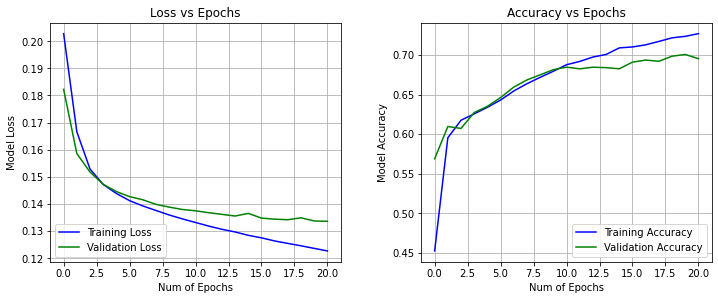


***************************************************************************************************************************
                                                     Grid Search: 2
***************************************************************************************************************************
Glove Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.sgd.SGD'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 200 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.22161,   Train F1 Score = 0.29906,   Validation Loss = 0.22157,   Validation F1 Score = 0.29695
Epoch   1:   Train Loss = 0.22153,   Train F1 Score = 0.29858,   Validation Loss = 0.22148,   Validation F1 Score = 0.29714
Epoch   2:   Train Loss = 0.22144,   Train F1 Score = 0.29927,   Validation Loss = 0.22140,   Validation F1 Score = 0.29723
Epoch   3:   

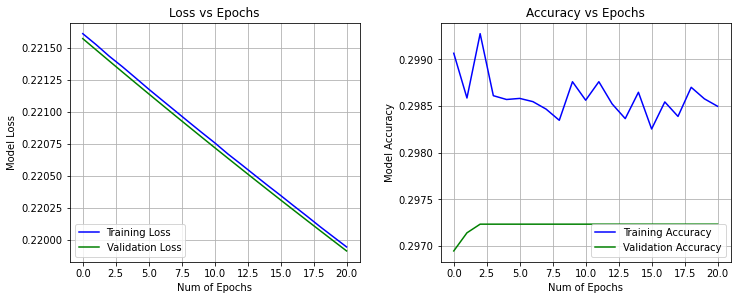


***************************************************************************************************************************
                                                     Grid Search: 3
***************************************************************************************************************************
Glove Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adadelta.Adadelta'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 200 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.22057,   Train F1 Score = 0.43335,   Validation Loss = 0.22061,   Validation F1 Score = 0.42460
Epoch   1:   Train Loss = 0.22053,   Train F1 Score = 0.43244,   Validation Loss = 0.22057,   Validation F1 Score = 0.42647
Epoch   2:   Train Loss = 0.22049,   Train F1 Score = 0.43175,   Validation Loss = 0.22053,   Validation F1 Score = 0.42660
Epo

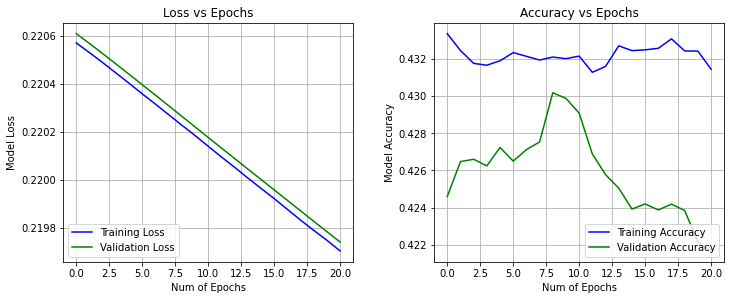


***************************************************************************************************************************
                                                     Grid Search: 4
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 200 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 1.00127,   Train F1 Score = 0.39156,   Validation Loss = 0.92410,   Validation F1 Score = 0.55007
Epoch   1:   Train Loss = 0.85066,   Train F1 Score = 0.59184,   Validation Loss = 0.80408,   Validation F1 Score = 0.60725
Epoch   2:   Train Loss = 0.77862,   Train F1 Score = 0.61489,   Validation Loss = 0.76881,   Validation F1 Score = 0.61650
Ep

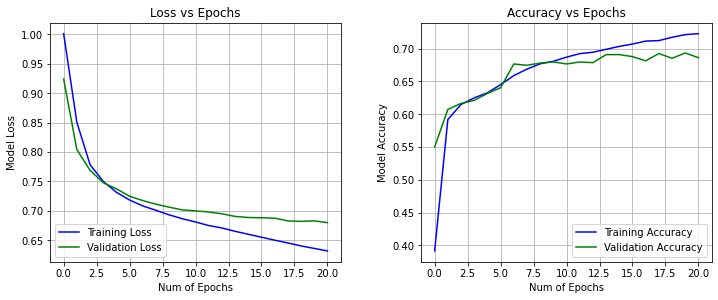


***************************************************************************************************************************
                                                     Grid Search: 5
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.sgd.SGD'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 200 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 1.09022,   Train F1 Score = 0.37300,   Validation Loss = 1.08941,   Validation F1 Score = 0.36753
Epoch   1:   Train Loss = 1.08879,   Train F1 Score = 0.36250,   Validation Loss = 1.08799,   Validation F1 Score = 0.35598
Epoch   2:   Train Loss = 1.08738,   Train F1 Score = 0.35217,   Validation Loss = 1.08659,   Validation F1 Score = 0.34398
Epoc

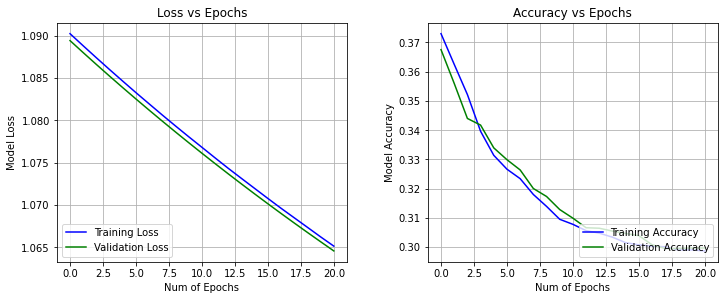


***************************************************************************************************************************
                                                     Grid Search: 6
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adadelta.Adadelta'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 200 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 1.11477,   Train F1 Score = 0.03338,   Validation Loss = 1.11498,   Validation F1 Score = 0.03272
Epoch   1:   Train Loss = 1.11426,   Train F1 Score = 0.03383,   Validation Loss = 1.11443,   Validation F1 Score = 0.03266
Epoch   2:   Train Loss = 1.11367,   Train F1 Score = 0.03422,   Validation Loss = 1.11385,   Validation F1 Score = 0.

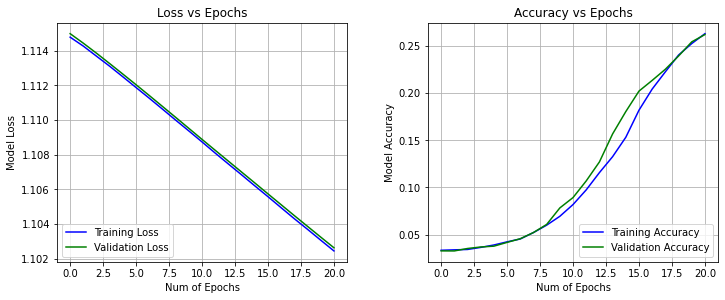


***************************************************************************************************************************
                                                     Grid Search: 7
***************************************************************************************************************************
Glove Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 2 
Hidden Dimensions: 200 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.19832,   Train F1 Score = 0.43007,   Validation Loss = 0.17245,   Validation F1 Score = 0.58606
Epoch   1:   Train Loss = 0.15729,   Train F1 Score = 0.60955,   Validation Loss = 0.15428,   Validation F1 Score = 0.59606
Epoch   2:   Train Loss = 0.14773,   Train F1 Score = 0.62573,   Validation Loss = 0.14724,   Validation F1 Score = 0.62197
Epoch   3: 

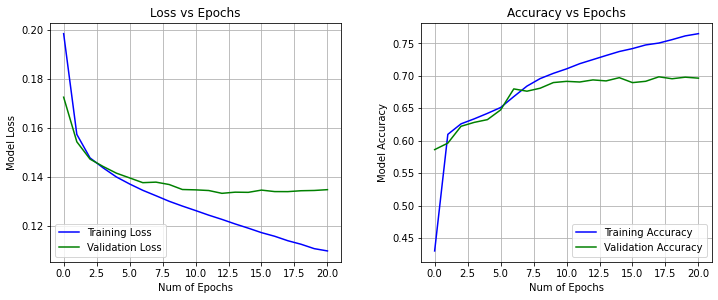


***************************************************************************************************************************
                                                     Grid Search: 8
***************************************************************************************************************************
Glove Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.sgd.SGD'> 
Activation Function: ReLU() 
Hidden Layers: 2 
Hidden Dimensions: 200 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.22462,   Train F1 Score = 0.03080,   Validation Loss = 0.22458,   Validation F1 Score = 0.03116
Epoch   1:   Train Loss = 0.22455,   Train F1 Score = 0.03109,   Validation Loss = 0.22451,   Validation F1 Score = 0.03116
Epoch   2:   Train Loss = 0.22449,   Train F1 Score = 0.03124,   Validation Loss = 0.22444,   Validation F1 Score = 0.03116
Epoch   3:   

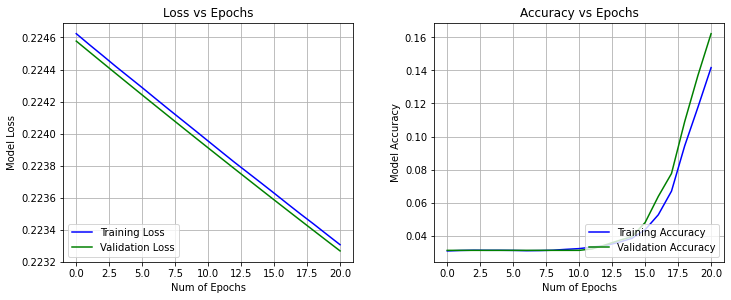


***************************************************************************************************************************
                                                     Grid Search: 9
***************************************************************************************************************************
Glove Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adadelta.Adadelta'> 
Activation Function: ReLU() 
Hidden Layers: 2 
Hidden Dimensions: 200 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.22191,   Train F1 Score = 0.23308,   Validation Loss = 0.22186,   Validation F1 Score = 0.23318
Epoch   1:   Train Loss = 0.22189,   Train F1 Score = 0.23331,   Validation Loss = 0.22184,   Validation F1 Score = 0.23318
Epoch   2:   Train Loss = 0.22187,   Train F1 Score = 0.23297,   Validation Loss = 0.22181,   Validation F1 Score = 0.23318
Epo

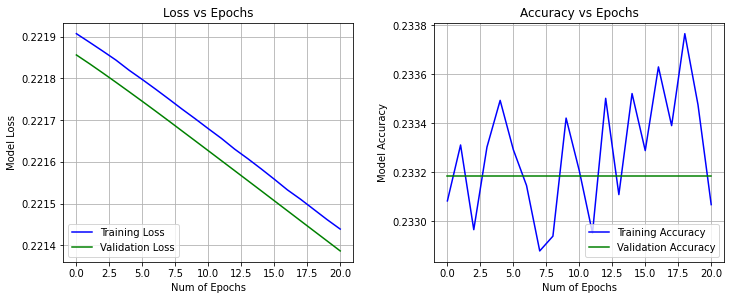


***************************************************************************************************************************
                                                     Grid Search: 10
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 2 
Hidden Dimensions: 200 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.99696,   Train F1 Score = 0.37729,   Validation Loss = 0.90645,   Validation F1 Score = 0.55828
Epoch   1:   Train Loss = 0.81555,   Train F1 Score = 0.60153,   Validation Loss = 0.77336,   Validation F1 Score = 0.60944
Epoch   2:   Train Loss = 0.75153,   Train F1 Score = 0.62166,   Validation Loss = 0.74711,   Validation F1 Score = 0.62148
E

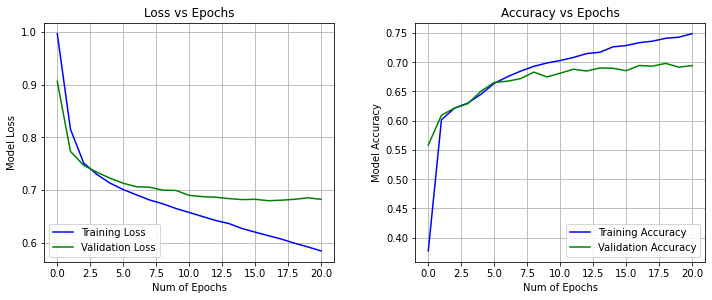


***************************************************************************************************************************
                                                     Grid Search: 11
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.sgd.SGD'> 
Activation Function: ReLU() 
Hidden Layers: 2 
Hidden Dimensions: 200 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 1.08873,   Train F1 Score = 0.27920,   Validation Loss = 1.08807,   Validation F1 Score = 0.28224
Epoch   1:   Train Loss = 1.08753,   Train F1 Score = 0.30035,   Validation Loss = 1.08688,   Validation F1 Score = 0.30674
Epoch   2:   Train Loss = 1.08636,   Train F1 Score = 0.32530,   Validation Loss = 1.08571,   Validation F1 Score = 0.33478
Epo

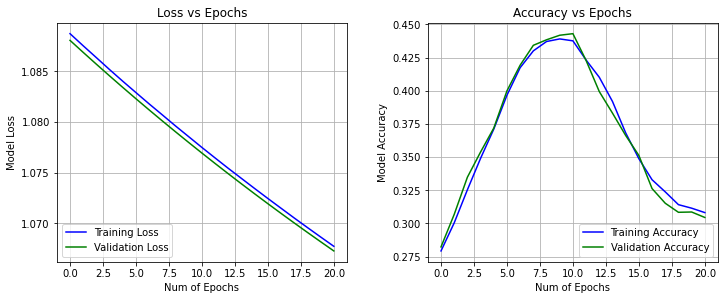


***************************************************************************************************************************
                                                     Grid Search: 12
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adadelta.Adadelta'> 
Activation Function: ReLU() 
Hidden Layers: 2 
Hidden Dimensions: 200 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 1.08255,   Train F1 Score = 0.29854,   Validation Loss = 1.08241,   Validation F1 Score = 0.29723
Epoch   1:   Train Loss = 1.08237,   Train F1 Score = 0.29862,   Validation Loss = 1.08222,   Validation F1 Score = 0.29723
Epoch   2:   Train Loss = 1.08219,   Train F1 Score = 0.29825,   Validation Loss = 1.08201,   Validation F1 Score = 0

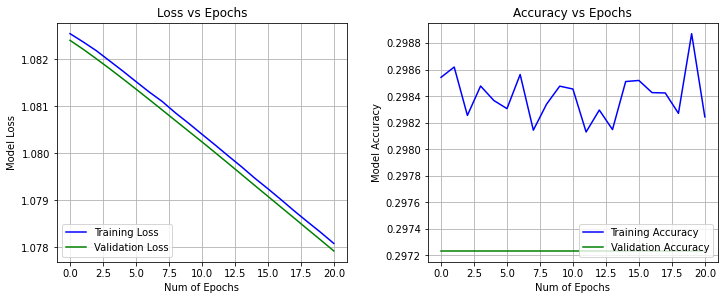


***************************************************************************************************************************
                                                     Grid Search: 13
***************************************************************************************************************************
Glove Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: LeakyReLU(negative_slope=0.01) 
Hidden Layers: 1 
Hidden Dimensions: 200 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.20163,   Train F1 Score = 0.36880,   Validation Loss = 0.18308,   Validation F1 Score = 0.51737
Epoch   1:   Train Loss = 0.16563,   Train F1 Score = 0.59549,   Validation Loss = 0.15687,   Validation F1 Score = 0.60744
Epoch   2:   Train Loss = 0.15170,   Train F1 Score = 0.61718,   Validation Loss = 0.15000,   Validation F1 Sc

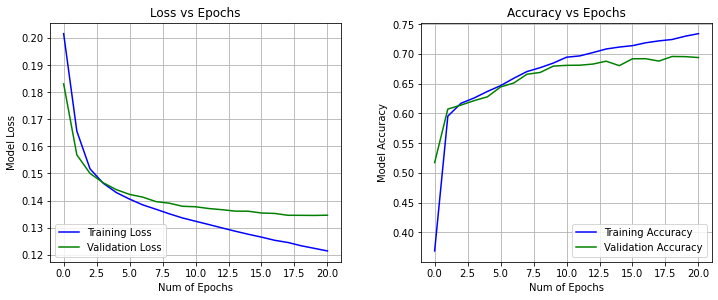


***************************************************************************************************************************
                                                     Grid Search: 14
***************************************************************************************************************************
Glove Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.sgd.SGD'> 
Activation Function: LeakyReLU(negative_slope=0.01) 
Hidden Layers: 1 
Hidden Dimensions: 200 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.22697,   Train F1 Score = 0.21051,   Validation Loss = 0.22685,   Validation F1 Score = 0.22514
Epoch   1:   Train Loss = 0.22686,   Train F1 Score = 0.21696,   Validation Loss = 0.22675,   Validation F1 Score = 0.22782
Epoch   2:   Train Loss = 0.22676,   Train F1 Score = 0.22221,   Validation Loss = 0.22665,   Validation F1 Scor

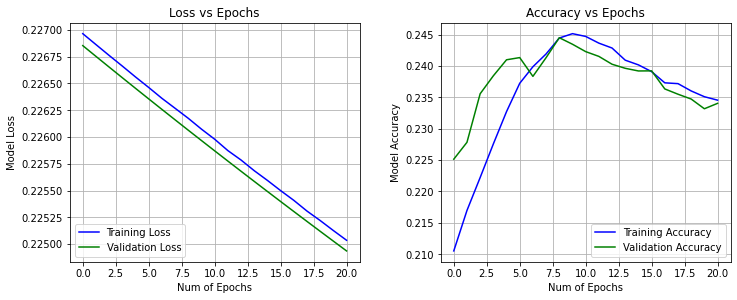


***************************************************************************************************************************
                                                     Grid Search: 15
***************************************************************************************************************************
Glove Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adadelta.Adadelta'> 
Activation Function: LeakyReLU(negative_slope=0.01) 
Hidden Layers: 1 
Hidden Dimensions: 200 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.22552,   Train F1 Score = 0.03631,   Validation Loss = 0.22545,   Validation F1 Score = 0.03293
Epoch   1:   Train Loss = 0.22546,   Train F1 Score = 0.03690,   Validation Loss = 0.22539,   Validation F1 Score = 0.03380
Epoch   2:   Train Loss = 0.22540,   Train F1 Score = 0.03855,   Validation Loss = 0.22533,   Validati

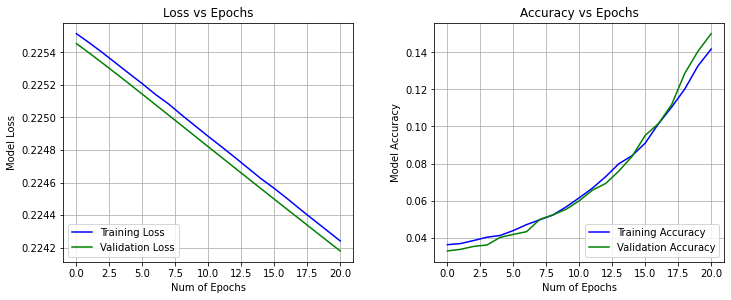


***************************************************************************************************************************
                                                     Grid Search: 16
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: LeakyReLU(negative_slope=0.01) 
Hidden Layers: 1 
Hidden Dimensions: 200 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.98317,   Train F1 Score = 0.43865,   Validation Loss = 0.90516,   Validation F1 Score = 0.56070
Epoch   1:   Train Loss = 0.83462,   Train F1 Score = 0.59444,   Validation Loss = 0.79600,   Validation F1 Score = 0.61176
Epoch   2:   Train Loss = 0.76949,   Train F1 Score = 0.61681,   Validation Loss = 0.76029,   Validat

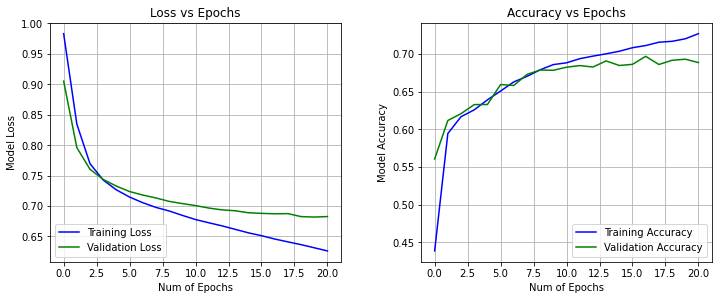


***************************************************************************************************************************
                                                     Grid Search: 17
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.sgd.SGD'> 
Activation Function: LeakyReLU(negative_slope=0.01) 
Hidden Layers: 1 
Hidden Dimensions: 200 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 1.10435,   Train F1 Score = 0.25215,   Validation Loss = 1.10362,   Validation F1 Score = 0.27404
Epoch   1:   Train Loss = 1.10240,   Train F1 Score = 0.29112,   Validation Loss = 1.10170,   Validation F1 Score = 0.29830
Epoch   2:   Train Loss = 1.10051,   Train F1 Score = 0.31016,   Validation Loss = 1.09981,   Validatio

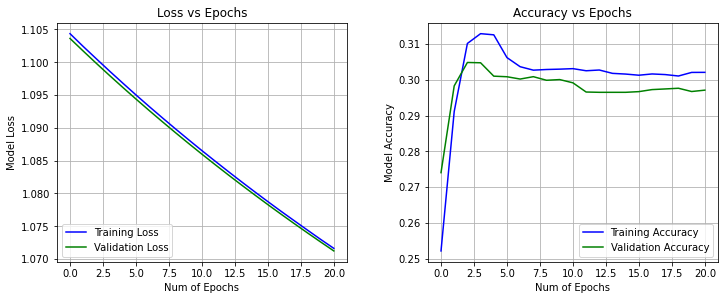


***************************************************************************************************************************
                                                     Grid Search: 18
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adadelta.Adadelta'> 
Activation Function: LeakyReLU(negative_slope=0.01) 
Hidden Layers: 1 
Hidden Dimensions: 200 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 1.08418,   Train F1 Score = 0.29813,   Validation Loss = 1.08409,   Validation F1 Score = 0.29723
Epoch   1:   Train Loss = 1.08377,   Train F1 Score = 0.29831,   Validation Loss = 1.08368,   Validation F1 Score = 0.29723
Epoch   2:   Train Loss = 1.08335,   Train F1 Score = 0.29846,   Validation Loss = 1.08325,  

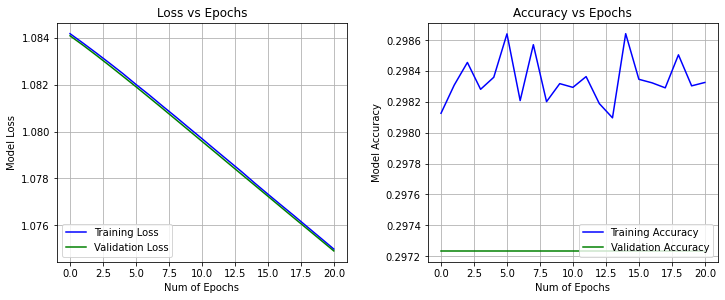


***************************************************************************************************************************
                                                     Grid Search: 19
***************************************************************************************************************************
Glove Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: LeakyReLU(negative_slope=0.01) 
Hidden Layers: 2 
Hidden Dimensions: 200 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.20089,   Train F1 Score = 0.40152,   Validation Loss = 0.17709,   Validation F1 Score = 0.56633
Epoch   1:   Train Loss = 0.15986,   Train F1 Score = 0.60124,   Validation Loss = 0.15261,   Validation F1 Score = 0.61499
Epoch   2:   Train Loss = 0.14841,   Train F1 Score = 0.62400,   Validation Loss = 0.14823,   Validation F1 Sc

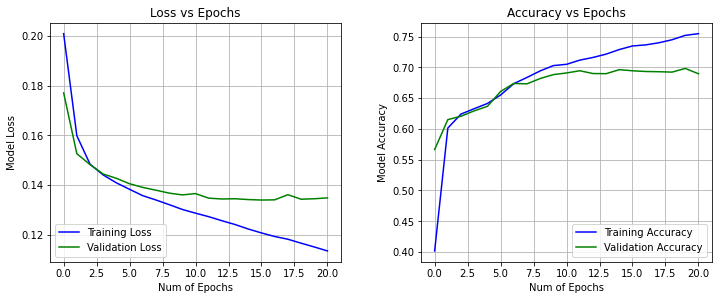


***************************************************************************************************************************
                                                     Grid Search: 20
***************************************************************************************************************************
Glove Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.sgd.SGD'> 
Activation Function: LeakyReLU(negative_slope=0.01) 
Hidden Layers: 2 
Hidden Dimensions: 200 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.22373,   Train F1 Score = 0.05897,   Validation Loss = 0.22371,   Validation F1 Score = 0.07054
Epoch   1:   Train Loss = 0.22366,   Train F1 Score = 0.06909,   Validation Loss = 0.22365,   Validation F1 Score = 0.08075
Epoch   2:   Train Loss = 0.22359,   Train F1 Score = 0.08546,   Validation Loss = 0.22358,   Validation F1 Scor

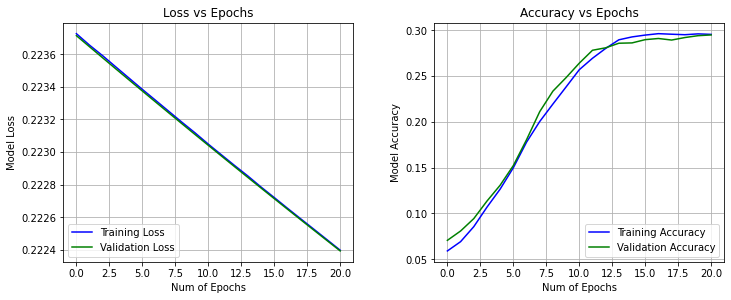


***************************************************************************************************************************
                                                     Grid Search: 21
***************************************************************************************************************************
Glove Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adadelta.Adadelta'> 
Activation Function: LeakyReLU(negative_slope=0.01) 
Hidden Layers: 2 
Hidden Dimensions: 200 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.21965,   Train F1 Score = 0.23337,   Validation Loss = 0.21964,   Validation F1 Score = 0.23318
Epoch   1:   Train Loss = 0.21963,   Train F1 Score = 0.23360,   Validation Loss = 0.21962,   Validation F1 Score = 0.23318
Epoch   2:   Train Loss = 0.21961,   Train F1 Score = 0.23305,   Validation Loss = 0.21960,   Validati

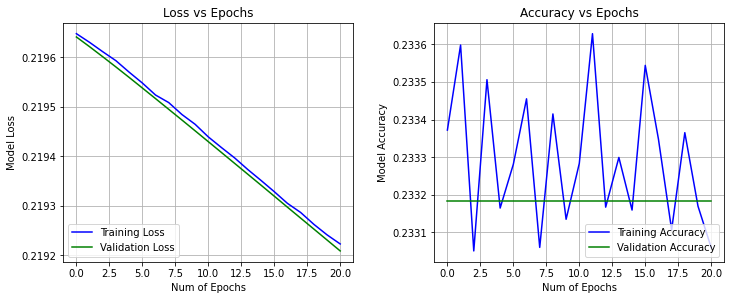


***************************************************************************************************************************
                                                     Grid Search: 22
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: LeakyReLU(negative_slope=0.01) 
Hidden Layers: 2 
Hidden Dimensions: 200 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 1.00738,   Train F1 Score = 0.35296,   Validation Loss = 0.91049,   Validation F1 Score = 0.54451
Epoch   1:   Train Loss = 0.82276,   Train F1 Score = 0.59330,   Validation Loss = 0.77937,   Validation F1 Score = 0.61790
Epoch   2:   Train Loss = 0.75387,   Train F1 Score = 0.62498,   Validation Loss = 0.74909,   Validat

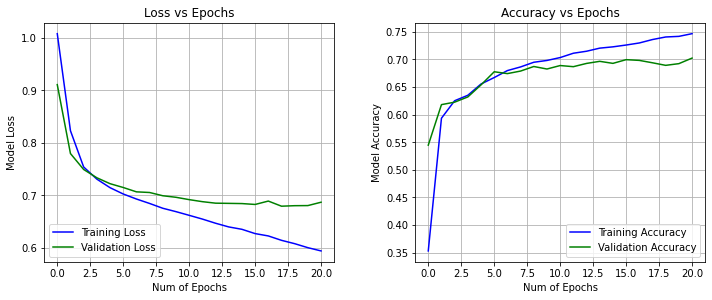


***************************************************************************************************************************
                                                     Grid Search: 23
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.sgd.SGD'> 
Activation Function: LeakyReLU(negative_slope=0.01) 
Hidden Layers: 2 
Hidden Dimensions: 200 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 1.11993,   Train F1 Score = 0.03080,   Validation Loss = 1.11897,   Validation F1 Score = 0.03116
Epoch   1:   Train Loss = 1.11834,   Train F1 Score = 0.03074,   Validation Loss = 1.11741,   Validation F1 Score = 0.03116
Epoch   2:   Train Loss = 1.11679,   Train F1 Score = 0.03107,   Validation Loss = 1.11588,   Validatio

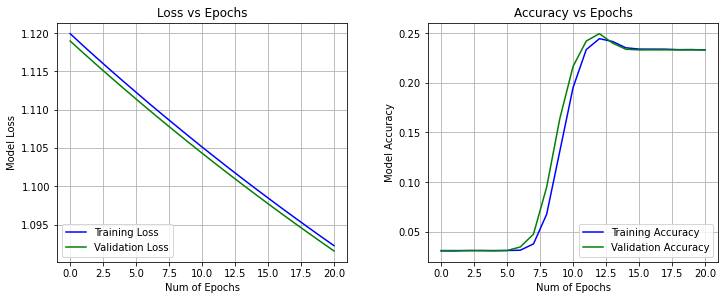


***************************************************************************************************************************
                                                     Grid Search: 24
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adadelta.Adadelta'> 
Activation Function: LeakyReLU(negative_slope=0.01) 
Hidden Layers: 2 
Hidden Dimensions: 200 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 1.08692,   Train F1 Score = 0.29839,   Validation Loss = 1.08684,   Validation F1 Score = 0.29723
Epoch   1:   Train Loss = 1.08673,   Train F1 Score = 0.29836,   Validation Loss = 1.08664,   Validation F1 Score = 0.29723
Epoch   2:   Train Loss = 1.08653,   Train F1 Score = 0.29800,   Validation Loss = 1.08643,  

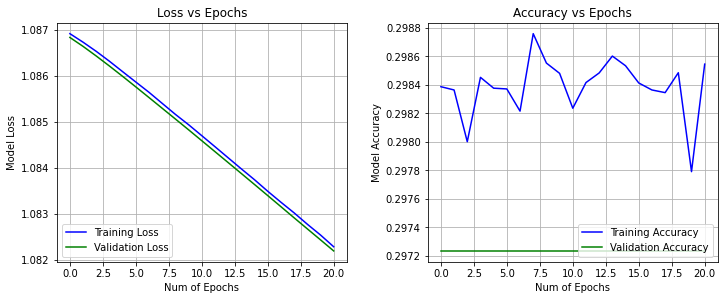

In [ ]:
vectorizers = ['Glove']
activation_functions = [nn.ReLU(), nn.LeakyReLU()]
hidden_layers = [1, 2]
loss_functions = [nn.MSELoss(),nn.CrossEntropyLoss()]
optimizers = ['Adam', 'SGD', 'Adadelta']
hidden_dimensions = [200]
learning_rates = [0.0001]

myGridSearch(vectorizers, activation_functions, hidden_layers, loss_functions, optimizers, hidden_dimensions, learning_rates, 0)

#### Observations

* Based on the previous results we can see that for hidden layer = 1 we get the best results. 
* After a speciffic number of epochs model starts overfitting. Lower learning rate could fix this problem. In that way we can also increase our epochs for a better evaluation. 
* Adam optimizer rate better for our data.

We'll run again the grid search function to find the best combination for our ffnn model with hidden layer = 1. 


***************************************************************************************************************************
                                                     Grid Search: 1
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 100 
Learning Rate: 2.5e-05
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 1.07688,   Train F1 Score = 0.29828,   Validation Loss = 1.06133,   Validation F1 Score = 0.29723
Epoch   1:   Train Loss = 1.04258,   Train F1 Score = 0.29837,   Validation Loss = 1.02477,   Validation F1 Score = 0.29723
Epoch   2:   Train Loss = 1.00490,   Train F1 Score = 0.30799,   Validation Loss = 0.98976,   Validation F1 Score = 0.32661
E

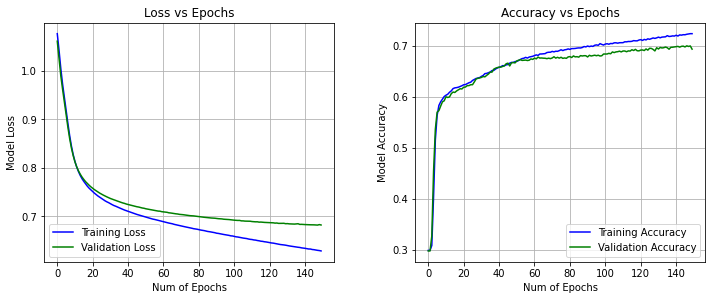


***************************************************************************************************************************
                                                     Grid Search: 2
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 100 
Learning Rate: 3.5e-05
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 1.07575,   Train F1 Score = 0.32249,   Validation Loss = 1.05613,   Validation F1 Score = 0.49905
Epoch   1:   Train Loss = 1.03213,   Train F1 Score = 0.49658,   Validation Loss = 1.00860,   Validation F1 Score = 0.46314
Epoch   2:   Train Loss = 0.98382,   Train F1 Score = 0.47457,   Validation Loss = 0.96639,   Validation F1 Score = 0.48228
E

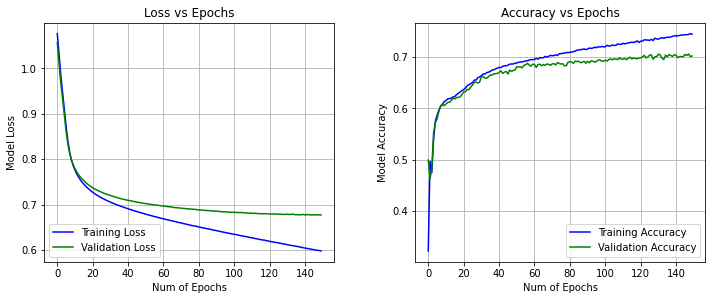


***************************************************************************************************************************
                                                     Grid Search: 3
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 150 
Learning Rate: 2.5e-05
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 1.08204,   Train F1 Score = 0.30052,   Validation Loss = 1.06042,   Validation F1 Score = 0.30265
Epoch   1:   Train Loss = 1.03393,   Train F1 Score = 0.35250,   Validation Loss = 1.00783,   Validation F1 Score = 0.41862
Epoch   2:   Train Loss = 0.98287,   Train F1 Score = 0.47612,   Validation Loss = 0.96377,   Validation F1 Score = 0.49112
E

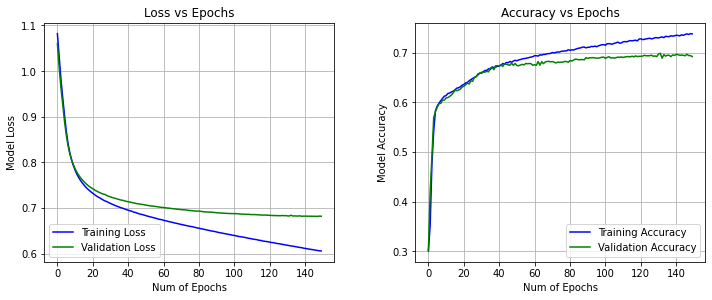


***************************************************************************************************************************
                                                     Grid Search: 4
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 150 
Learning Rate: 3.5e-05
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 1.05528,   Train F1 Score = 0.40518,   Validation Loss = 1.02378,   Validation F1 Score = 0.33802
Epoch   1:   Train Loss = 0.99374,   Train F1 Score = 0.36166,   Validation Loss = 0.96955,   Validation F1 Score = 0.45519
Epoch   2:   Train Loss = 0.94350,   Train F1 Score = 0.52661,   Validation Loss = 0.92262,   Validation F1 Score = 0.53976
E

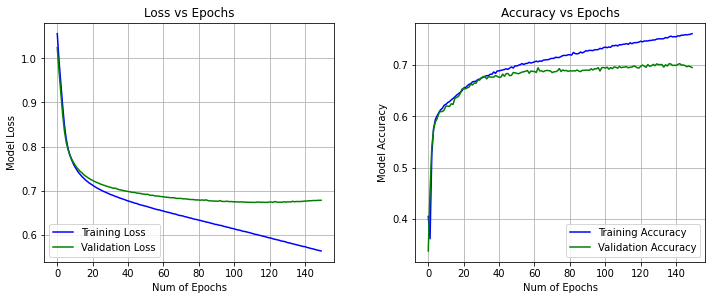

In [ ]:
vectorizers = ['Glove']
activation_functions = [nn.ReLU()]
hidden_layers = [1]
loss_functions = [nn.CrossEntropyLoss()]
optimizers = ['Adam']
hidden_dimensions = [100, 150]
learning_rates = [0.000025, 0.000035]

myGridSearch(vectorizers, activation_functions, hidden_layers, loss_functions, optimizers, hidden_dimensions, learning_rates, 0)

#### Best Model for GloVe



***************************************************************************************************************************
                                                     Grid Search: 1
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 100 
Learning Rate: 2.5e-05
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Train Precision Score = 0.73422
Train F1 Score = 0.72353
Train Recall Score = 0.73368
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Validation Precision Score = 0.70698
Validation F1 Score = 0.69458
Validation Recall Score = 0.70581




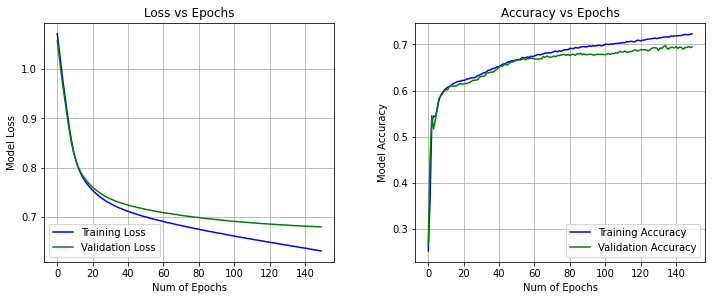

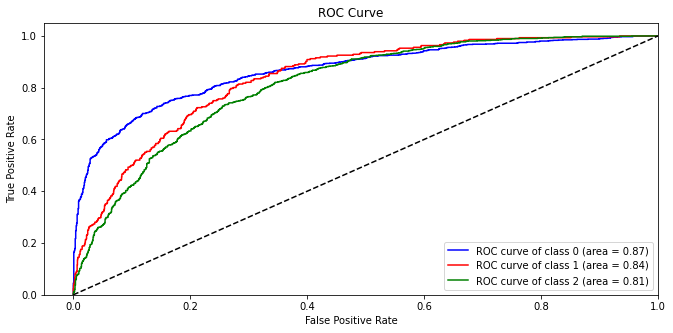

In [62]:
vectorizers = ['Glove']
activation_functions = [nn.ReLU()]
hidden_layers = [1]
loss_functions = [nn.CrossEntropyLoss()]
optimizers = ['Adam']
hidden_dimensions = [100]
learning_rates = [0.000025]

myGridSearch(vectorizers, activation_functions, hidden_layers, loss_functions, optimizers, hidden_dimensions, learning_rates, 1)

### Second Model (TF-IDF)

Changes in hyperparameters affect TF-IDF model in the same way as they did to GloVe model. However, based on the following results, we can observe that the phenomenon of overfitting is more frequent and more intense. In some occasions however, we achieve a higher validation accuracy than we did previously, but as it's been told, model cannot generalize that well and overfits. 

#### Hidden layers, learning rates, hidden dimensions

Model seems to overfit in every occasions, so we'll prefer low hidden_layers and we'll lower even more the learning rate.



***************************************************************************************************************************
                                                     Grid Search: 1
***************************************************************************************************************************
TF-IDF Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 200 
Learning Rate: 0.001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.15891,   Train F1 Score = 0.58666,   Validation Loss = 0.13200,   Validation F1 Score = 0.65558
Epoch   1:   Train Loss = 0.10268,   Train F1 Score = 0.77652,   Validation Loss = 0.12833,   Validation F1 Score = 0.71973
Epoch   2:   Train Loss = 0.07651,   Train F1 Score = 0.84876,   Validation Loss = 0.13884,   Validation F1 Score = 0.70767
Epoch   3:

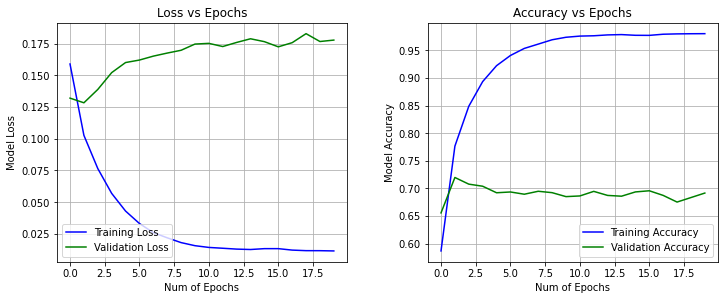



***************************************************************************************************************************
                                                     Grid Search: 2
***************************************************************************************************************************
TF-IDF Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 200 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.21786,   Train F1 Score = 0.30376,   Validation Loss = 0.20565,   Validation F1 Score = 0.35419
Epoch   1:   Train Loss = 0.18557,   Train F1 Score = 0.50582,   Validation Loss = 0.16665,   Validation F1 Score = 0.61954
Epoch   2:   Train Loss = 0.14466,   Train F1 Score = 0.66620,   Validation Loss = 0.14187,   Validation F1 Score = 0.65030
Epoch   3

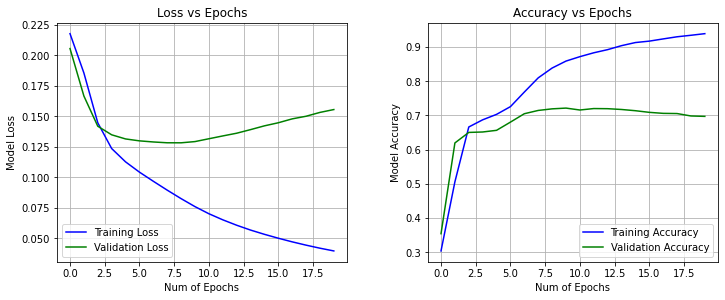



***************************************************************************************************************************
                                                     Grid Search: 3
***************************************************************************************************************************
TF-IDF Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 3 
Hidden Dimensions: 200 
Learning Rate: 0.001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.16258,   Train F1 Score = 0.52461,   Validation Loss = 0.14009,   Validation F1 Score = 0.63560
Epoch   1:   Train Loss = 0.10820,   Train F1 Score = 0.74660,   Validation Loss = 0.13297,   Validation F1 Score = 0.70763
Epoch   2:   Train Loss = 0.07553,   Train F1 Score = 0.84891,   Validation Loss = 0.14072,   Validation F1 Score = 0.69845
Epoch   3:

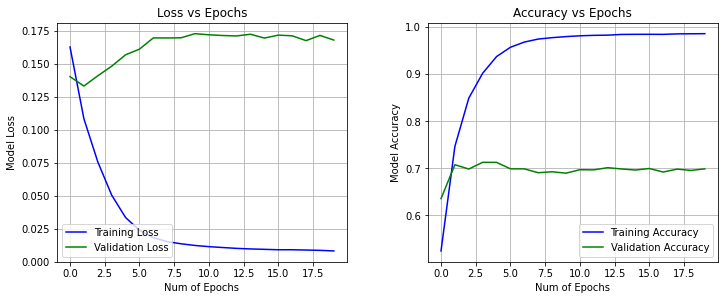



***************************************************************************************************************************
                                                     Grid Search: 4
***************************************************************************************************************************
TF-IDF Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 3 
Hidden Dimensions: 200 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.21325,   Train F1 Score = 0.29856,   Validation Loss = 0.20011,   Validation F1 Score = 0.29807
Epoch   1:   Train Loss = 0.17811,   Train F1 Score = 0.40957,   Validation Loss = 0.15255,   Validation F1 Score = 0.63648
Epoch   2:   Train Loss = 0.13025,   Train F1 Score = 0.67847,   Validation Loss = 0.13848,   Validation F1 Score = 0.64575
Epoch   3

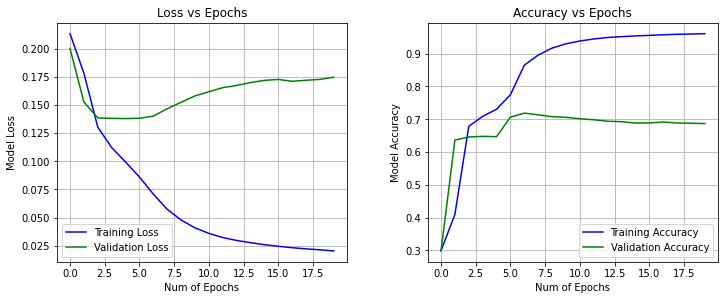



***************************************************************************************************************************
                                                     Grid Search: 5
***************************************************************************************************************************
TF-IDF Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 5 
Hidden Dimensions: 200 
Learning Rate: 0.001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.16852,   Train F1 Score = 0.50549,   Validation Loss = 0.14217,   Validation F1 Score = 0.64186
Epoch   1:   Train Loss = 0.11733,   Train F1 Score = 0.69187,   Validation Loss = 0.13640,   Validation F1 Score = 0.70683
Epoch   2:   Train Loss = 0.07992,   Train F1 Score = 0.84039,   Validation Loss = 0.13626,   Validation F1 Score = 0.70829
Epoch   3:

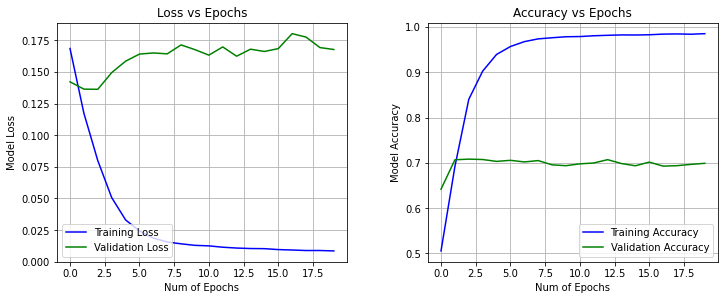



***************************************************************************************************************************
                                                     Grid Search: 6
***************************************************************************************************************************
TF-IDF Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 5 
Hidden Dimensions: 200 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.20838,   Train F1 Score = 0.29820,   Validation Loss = 0.19861,   Validation F1 Score = 0.29826
Epoch   1:   Train Loss = 0.17871,   Train F1 Score = 0.37925,   Validation Loss = 0.15649,   Validation F1 Score = 0.62756
Epoch   2:   Train Loss = 0.13498,   Train F1 Score = 0.67423,   Validation Loss = 0.14409,   Validation F1 Score = 0.64397
Epoch   3

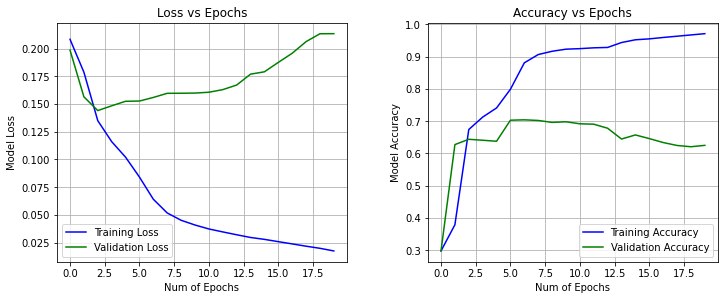



***************************************************************************************************************************
                                                     Grid Search: 7
***************************************************************************************************************************
TF-IDF Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 400 
Learning Rate: 0.001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.15221,   Train F1 Score = 0.57845,   Validation Loss = 0.12948,   Validation F1 Score = 0.69251
Epoch   1:   Train Loss = 0.09850,   Train F1 Score = 0.79081,   Validation Loss = 0.12951,   Validation F1 Score = 0.71272
Epoch   2:   Train Loss = 0.06806,   Train F1 Score = 0.86637,   Validation Loss = 0.14038,   Validation F1 Score = 0.70875
Epoch   3:

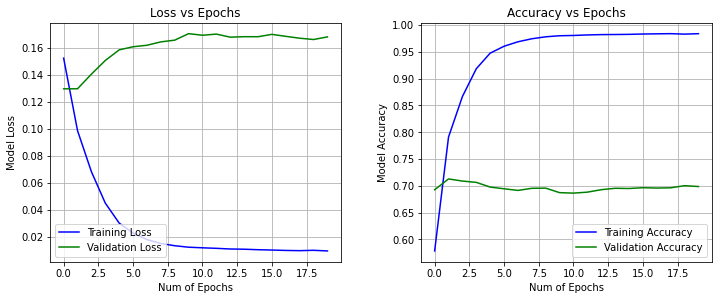



***************************************************************************************************************************
                                                     Grid Search: 8
***************************************************************************************************************************
TF-IDF Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 400 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.21113,   Train F1 Score = 0.29879,   Validation Loss = 0.19149,   Validation F1 Score = 0.47250
Epoch   1:   Train Loss = 0.16065,   Train F1 Score = 0.63187,   Validation Loss = 0.14322,   Validation F1 Score = 0.64402
Epoch   2:   Train Loss = 0.12353,   Train F1 Score = 0.68357,   Validation Loss = 0.13349,   Validation F1 Score = 0.65313
Epoch   3

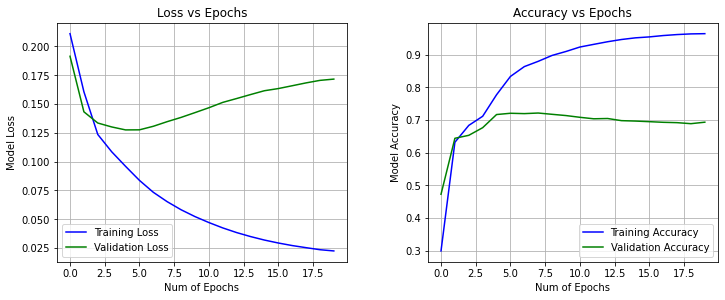



***************************************************************************************************************************
                                                     Grid Search: 9
***************************************************************************************************************************
TF-IDF Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 3 
Hidden Dimensions: 400 
Learning Rate: 0.001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.15787,   Train F1 Score = 0.55439,   Validation Loss = 0.13570,   Validation F1 Score = 0.63790
Epoch   1:   Train Loss = 0.10149,   Train F1 Score = 0.77139,   Validation Loss = 0.12931,   Validation F1 Score = 0.71519
Epoch   2:   Train Loss = 0.06032,   Train F1 Score = 0.88179,   Validation Loss = 0.14187,   Validation F1 Score = 0.71774
Epoch   3:

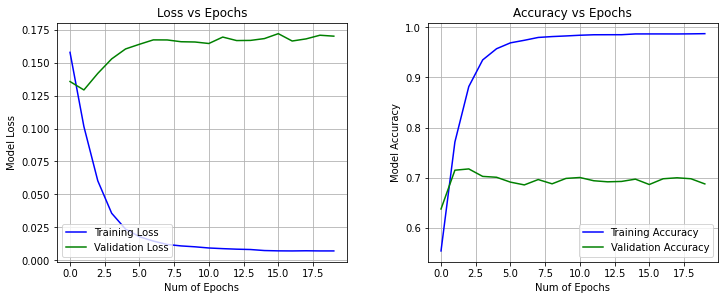



***************************************************************************************************************************
                                                     Grid Search: 10
***************************************************************************************************************************
TF-IDF Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 3 
Hidden Dimensions: 400 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.20348,   Train F1 Score = 0.30180,   Validation Loss = 0.18288,   Validation F1 Score = 0.29922
Epoch   1:   Train Loss = 0.14963,   Train F1 Score = 0.58820,   Validation Loss = 0.14115,   Validation F1 Score = 0.64866
Epoch   2:   Train Loss = 0.11552,   Train F1 Score = 0.70702,   Validation Loss = 0.13916,   Validation F1 Score = 0.64921
Epoch   

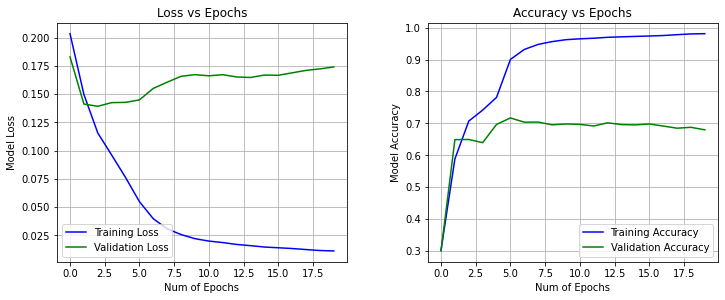



***************************************************************************************************************************
                                                     Grid Search: 11
***************************************************************************************************************************
TF-IDF Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 5 
Hidden Dimensions: 400 
Learning Rate: 0.001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.16256,   Train F1 Score = 0.53519,   Validation Loss = 0.13739,   Validation F1 Score = 0.64430
Epoch   1:   Train Loss = 0.10960,   Train F1 Score = 0.73183,   Validation Loss = 0.13720,   Validation F1 Score = 0.70551
Epoch   2:   Train Loss = 0.07170,   Train F1 Score = 0.85588,   Validation Loss = 0.14481,   Validation F1 Score = 0.70999
Epoch   3

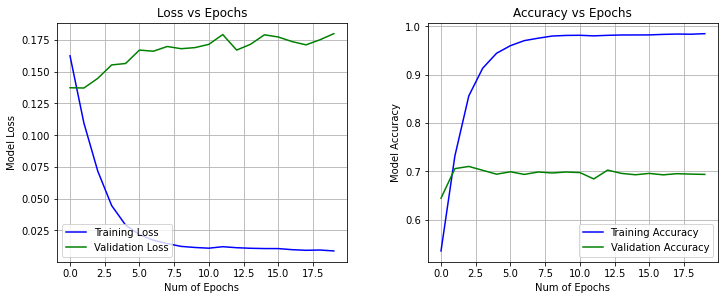



***************************************************************************************************************************
                                                     Grid Search: 12
***************************************************************************************************************************
TF-IDF Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 5 
Hidden Dimensions: 400 
Learning Rate: 0.0001
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.20244,   Train F1 Score = 0.29816,   Validation Loss = 0.18087,   Validation F1 Score = 0.29759
Epoch   1:   Train Loss = 0.14753,   Train F1 Score = 0.60612,   Validation Loss = 0.14645,   Validation F1 Score = 0.63574
Epoch   2:   Train Loss = 0.11669,   Train F1 Score = 0.71195,   Validation Loss = 0.14551,   Validation F1 Score = 0.64989
Epoch   

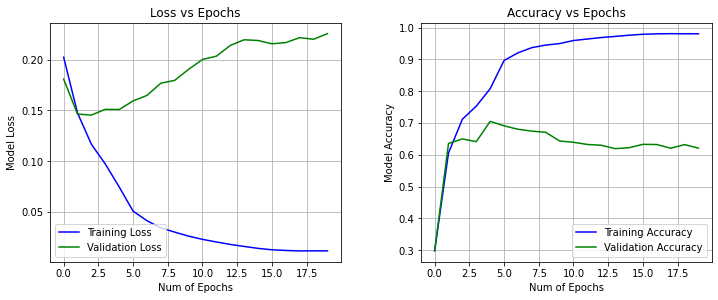

In [ ]:
vectorizers = ['TF-IDF']
activation_functions = [nn.ReLU()]
hidden_layers = [1, 3, 5]
loss_functions = [nn.MSELoss()]
optimizers = ['Adam']
hidden_dimensions = [200, 400]
learning_rates = [0.001, 0.0001]

myGridSearch(vectorizers, activation_functions, hidden_layers, loss_functions, optimizers, hidden_dimensions, learning_rates, 0)

#### Activation functions, loss functions, optimizers

MSE loss function seems to work slightly better than Cross Entropy in current model. Previously in the GloVe model, it was the other way around.


***************************************************************************************************************************
                                                     Grid Search: 1
***************************************************************************************************************************
TF-IDF Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 250 
Learning Rate: 1e-05
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.22600,   Train F1 Score = 0.07025,   Validation Loss = 0.22528,   Validation F1 Score = 0.25969
Epoch   1:   Train Loss = 0.22454,   Train F1 Score = 0.23480,   Validation Loss = 0.22375,   Validation F1 Score = 0.23318
Epoch   2:   Train Loss = 0.22285,   Train F1 Score = 0.23390,   Validation Loss = 0.22194,   Validation F1 Score = 0.23318
Epoch   3: 

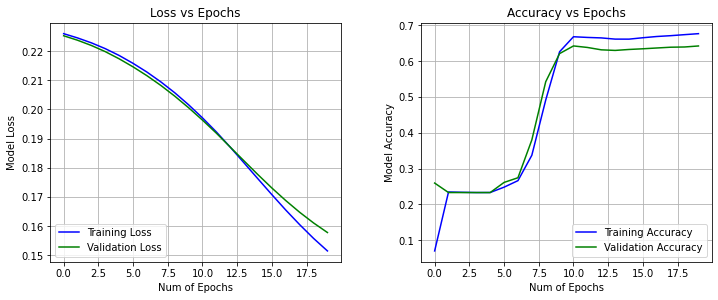


***************************************************************************************************************************
                                                     Grid Search: 2
***************************************************************************************************************************
TF-IDF Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.sgd.SGD'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 250 
Learning Rate: 1e-05
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.22787,   Train F1 Score = 0.03088,   Validation Loss = 0.22785,   Validation F1 Score = 0.03116
Epoch   1:   Train Loss = 0.22786,   Train F1 Score = 0.03094,   Validation Loss = 0.22784,   Validation F1 Score = 0.03116
Epoch   2:   Train Loss = 0.22785,   Train F1 Score = 0.03118,   Validation Loss = 0.22784,   Validation F1 Score = 0.03116
Epoch   3:   

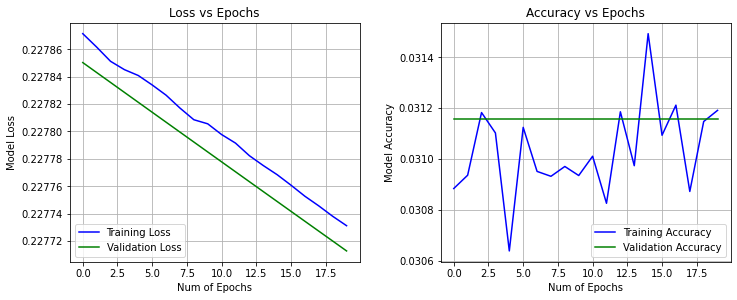


***************************************************************************************************************************
                                                     Grid Search: 3
***************************************************************************************************************************
TF-IDF Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adadelta.Adadelta'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 250 
Learning Rate: 1e-05
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.22719,   Train F1 Score = 0.03094,   Validation Loss = 0.22717,   Validation F1 Score = 0.03116
Epoch   1:   Train Loss = 0.22719,   Train F1 Score = 0.03097,   Validation Loss = 0.22717,   Validation F1 Score = 0.03116
Epoch   2:   Train Loss = 0.22719,   Train F1 Score = 0.03126,   Validation Loss = 0.22716,   Validation F1 Score = 0.03116
Epo

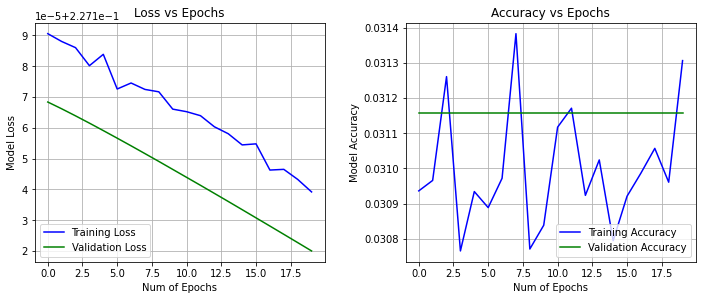


***************************************************************************************************************************
                                                     Grid Search: 4
***************************************************************************************************************************
TF-IDF Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 250 
Learning Rate: 1e-05
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 1.11105,   Train F1 Score = 0.03108,   Validation Loss = 1.10793,   Validation F1 Score = 0.03202
Epoch   1:   Train Loss = 1.10468,   Train F1 Score = 0.21298,   Validation Loss = 1.10130,   Validation F1 Score = 0.23318
Epoch   2:   Train Loss = 1.09730,   Train F1 Score = 0.23356,   Validation Loss = 1.09333,   Validation F1 Score = 0.23318
Ep

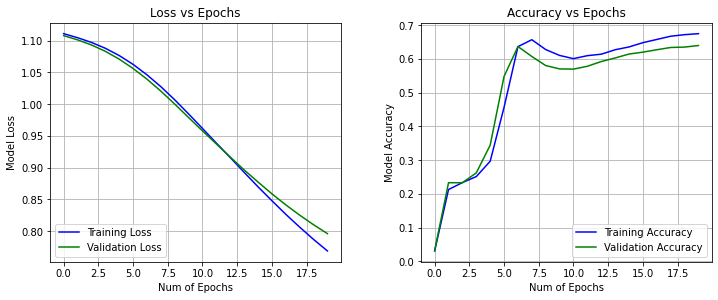


***************************************************************************************************************************
                                                     Grid Search: 5
***************************************************************************************************************************
TF-IDF Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.sgd.SGD'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 250 
Learning Rate: 1e-05
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 1.07359,   Train F1 Score = 0.24205,   Validation Loss = 1.07359,   Validation F1 Score = 0.24334
Epoch   1:   Train Loss = 1.07351,   Train F1 Score = 0.24471,   Validation Loss = 1.07350,   Validation F1 Score = 0.24512
Epoch   2:   Train Loss = 1.07343,   Train F1 Score = 0.24718,   Validation Loss = 1.07342,   Validation F1 Score = 0.24959
Epoc

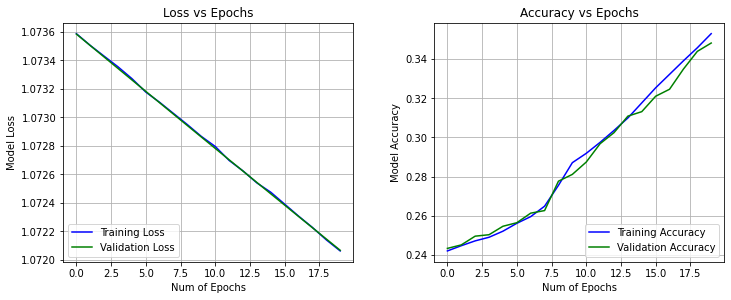


***************************************************************************************************************************
                                                     Grid Search: 6
***************************************************************************************************************************
TF-IDF Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adadelta.Adadelta'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 250 
Learning Rate: 1e-05
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 1.09156,   Train F1 Score = 0.23341,   Validation Loss = 1.09157,   Validation F1 Score = 0.23318
Epoch   1:   Train Loss = 1.09155,   Train F1 Score = 0.23311,   Validation Loss = 1.09155,   Validation F1 Score = 0.23318
Epoch   2:   Train Loss = 1.09153,   Train F1 Score = 0.23366,   Validation Loss = 1.09154,   Validation F1 Score = 0.

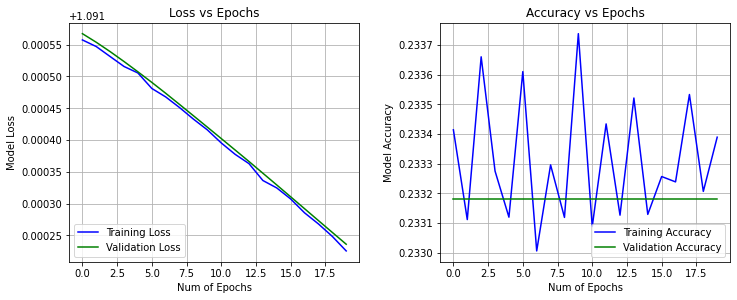


***************************************************************************************************************************
                                                     Grid Search: 7
***************************************************************************************************************************
TF-IDF Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: LeakyReLU(negative_slope=0.01) 
Hidden Layers: 1 
Hidden Dimensions: 250 
Learning Rate: 1e-05
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.21824,   Train F1 Score = 0.29833,   Validation Loss = 0.21767,   Validation F1 Score = 0.29723
Epoch   1:   Train Loss = 0.21704,   Train F1 Score = 0.29831,   Validation Loss = 0.21643,   Validation F1 Score = 0.29723
Epoch   2:   Train Loss = 0.21563,   Train F1 Score = 0.29815,   Validation Loss = 0.21490,   Validation F1 Sco

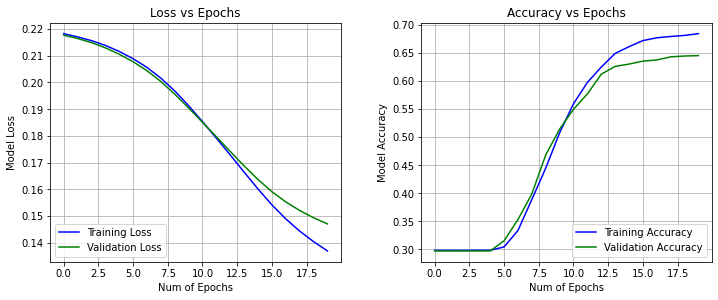


***************************************************************************************************************************
                                                     Grid Search: 8
***************************************************************************************************************************
TF-IDF Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.sgd.SGD'> 
Activation Function: LeakyReLU(negative_slope=0.01) 
Hidden Layers: 1 
Hidden Dimensions: 250 
Learning Rate: 1e-05
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.22731,   Train F1 Score = 0.03112,   Validation Loss = 0.22730,   Validation F1 Score = 0.03116
Epoch   1:   Train Loss = 0.22730,   Train F1 Score = 0.03097,   Validation Loss = 0.22730,   Validation F1 Score = 0.03116
Epoch   2:   Train Loss = 0.22729,   Train F1 Score = 0.03130,   Validation Loss = 0.22729,   Validation F1 Score

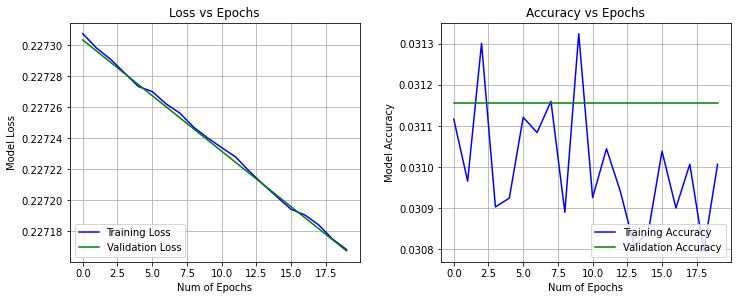


***************************************************************************************************************************
                                                     Grid Search: 9
***************************************************************************************************************************
TF-IDF Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adadelta.Adadelta'> 
Activation Function: LeakyReLU(negative_slope=0.01) 
Hidden Layers: 1 
Hidden Dimensions: 250 
Learning Rate: 1e-05
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.22202,   Train F1 Score = 0.29871,   Validation Loss = 0.22205,   Validation F1 Score = 0.29723
Epoch   1:   Train Loss = 0.22202,   Train F1 Score = 0.29823,   Validation Loss = 0.22204,   Validation F1 Score = 0.29723
Epoch   2:   Train Loss = 0.22202,   Train F1 Score = 0.29835,   Validation Loss = 0.22204,   Validatio

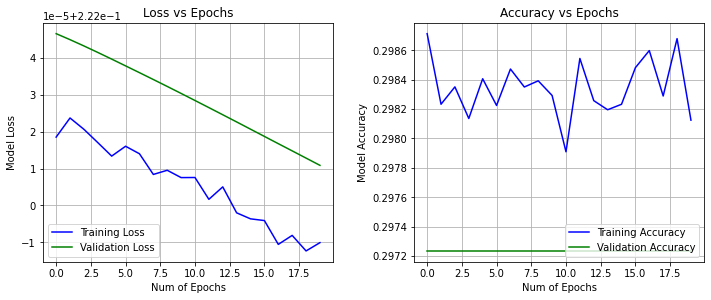


***************************************************************************************************************************
                                                     Grid Search: 10
***************************************************************************************************************************
TF-IDF Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: LeakyReLU(negative_slope=0.01) 
Hidden Layers: 1 
Hidden Dimensions: 250 
Learning Rate: 1e-05
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 1.09475,   Train F1 Score = 0.23360,   Validation Loss = 1.09202,   Validation F1 Score = 0.23318
Epoch   1:   Train Loss = 1.08898,   Train F1 Score = 0.23344,   Validation Loss = 1.08584,   Validation F1 Score = 0.23318
Epoch   2:   Train Loss = 1.08192,   Train F1 Score = 0.25279,   Validation Loss = 1.07808,   Validat

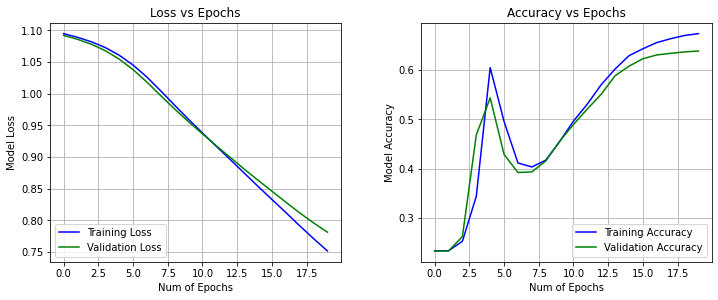


***************************************************************************************************************************
                                                     Grid Search: 11
***************************************************************************************************************************
TF-IDF Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.sgd.SGD'> 
Activation Function: LeakyReLU(negative_slope=0.01) 
Hidden Layers: 1 
Hidden Dimensions: 250 
Learning Rate: 1e-05
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 1.10904,   Train F1 Score = 0.03103,   Validation Loss = 1.10904,   Validation F1 Score = 0.03116
Epoch   1:   Train Loss = 1.10892,   Train F1 Score = 0.03097,   Validation Loss = 1.10891,   Validation F1 Score = 0.03116
Epoch   2:   Train Loss = 1.10879,   Train F1 Score = 0.03120,   Validation Loss = 1.10879,   Validatio

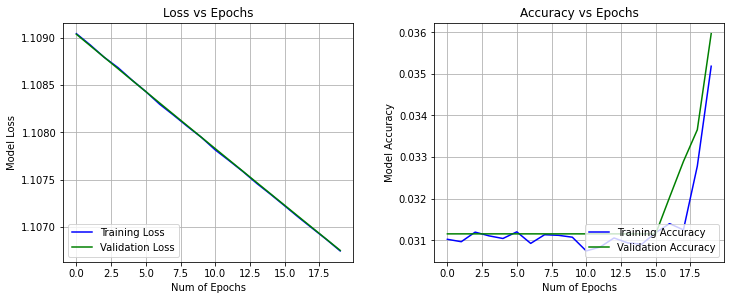


***************************************************************************************************************************
                                                     Grid Search: 12
***************************************************************************************************************************
TF-IDF Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adadelta.Adadelta'> 
Activation Function: LeakyReLU(negative_slope=0.01) 
Hidden Layers: 1 
Hidden Dimensions: 250 
Learning Rate: 1e-05
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 1.07768,   Train F1 Score = 0.29839,   Validation Loss = 1.07777,   Validation F1 Score = 0.29723
Epoch   1:   Train Loss = 1.07765,   Train F1 Score = 0.29841,   Validation Loss = 1.07775,   Validation F1 Score = 0.29723
Epoch   2:   Train Loss = 1.07765,   Train F1 Score = 0.29841,   Validation Loss = 1.07774,  

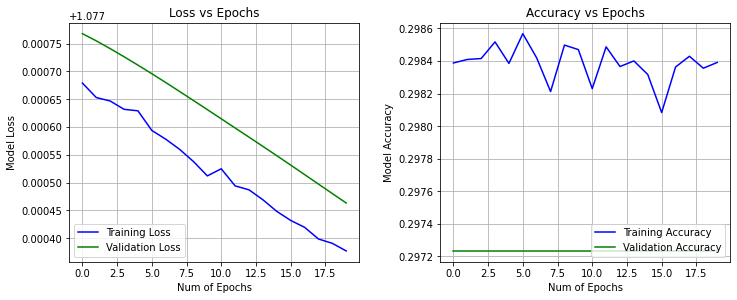

In [36]:
vectorizers = ['TF-IDF']
activation_functions = [nn.ReLU(), nn.LeakyReLU()]
hidden_layers = [1]
loss_functions = [nn.MSELoss(),nn.CrossEntropyLoss()]
optimizers = ['Adam', 'SGD', 'Adadelta']
hidden_dimensions = [250]
learning_rates = [0.00001]

myGridSearch(vectorizers, activation_functions, hidden_layers, loss_functions, optimizers, hidden_dimensions, learning_rates, 0)

#### Observations

Our best options for TF-IDF model... Tried different methods (lower epochs, lower learning rate, lower units) to prevent overfitting... Ιn some cases they were succesfull, like in the first plot. However, validation accuracy wasn't that good as it were previously in the GloVe Model. 


***************************************************************************************************************************
                                                     Grid Search: 1
***************************************************************************************************************************
TF-IDF Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 150 
Learning Rate: 1e-05
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.22174,   Train F1 Score = 0.29842,   Validation Loss = 0.22130,   Validation F1 Score = 0.29723
Epoch   1:   Train Loss = 0.22080,   Train F1 Score = 0.29850,   Validation Loss = 0.22035,   Validation F1 Score = 0.29723
Epoch   2:   Train Loss = 0.21978,   Train F1 Score = 0.29818,   Validation Loss = 0.21927,   Validation F1 Score = 0.29723
Epoch   3: 

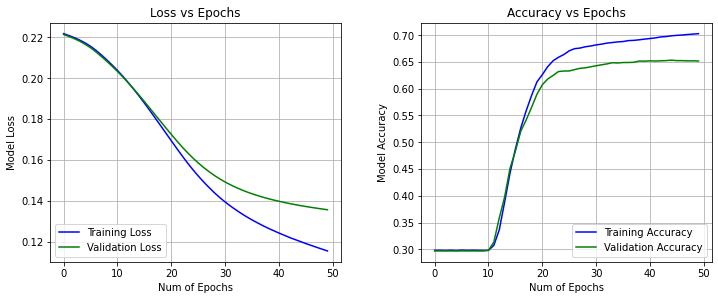


***************************************************************************************************************************
                                                     Grid Search: 2
***************************************************************************************************************************
TF-IDF Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 150 
Learning Rate: 5e-05
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.22092,   Train F1 Score = 0.29055,   Validation Loss = 0.21804,   Validation F1 Score = 0.29723
Epoch   1:   Train Loss = 0.21364,   Train F1 Score = 0.29962,   Validation Loss = 0.20881,   Validation F1 Score = 0.31276
Epoch   2:   Train Loss = 0.20240,   Train F1 Score = 0.44076,   Validation Loss = 0.19637,   Validation F1 Score = 0.53454
Epoch   3: 

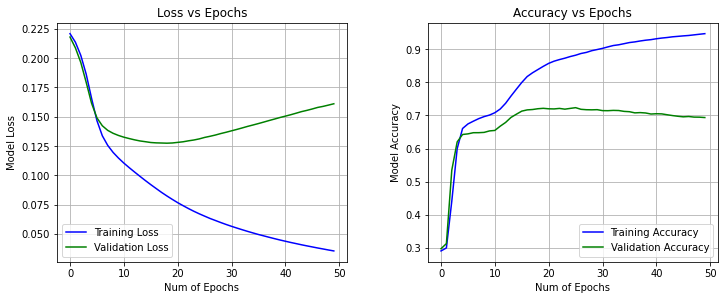


***************************************************************************************************************************
                                                     Grid Search: 3
***************************************************************************************************************************
TF-IDF Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 200 
Learning Rate: 1e-05
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.22576,   Train F1 Score = 0.03111,   Validation Loss = 0.22512,   Validation F1 Score = 0.03116
Epoch   1:   Train Loss = 0.22447,   Train F1 Score = 0.16195,   Validation Loss = 0.22379,   Validation F1 Score = 0.23318
Epoch   2:   Train Loss = 0.22299,   Train F1 Score = 0.23351,   Validation Loss = 0.22220,   Validation F1 Score = 0.23318
Epoch   3: 

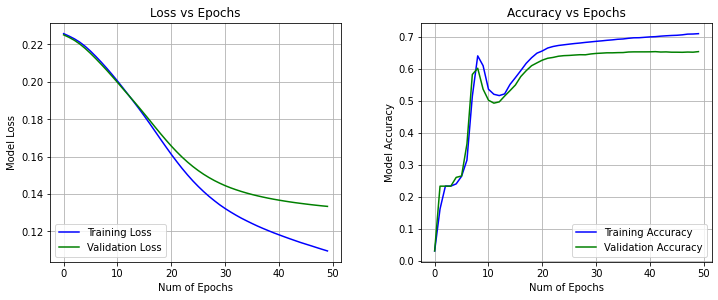


***************************************************************************************************************************
                                                     Grid Search: 4
***************************************************************************************************************************
TF-IDF Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 200 
Learning Rate: 5e-05
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.21769,   Train F1 Score = 0.29816,   Validation Loss = 0.21467,   Validation F1 Score = 0.29723
Epoch   1:   Train Loss = 0.20948,   Train F1 Score = 0.30425,   Validation Loss = 0.20341,   Validation F1 Score = 0.35942
Epoch   2:   Train Loss = 0.19251,   Train F1 Score = 0.53916,   Validation Loss = 0.18279,   Validation F1 Score = 0.61981
Epoch   3: 

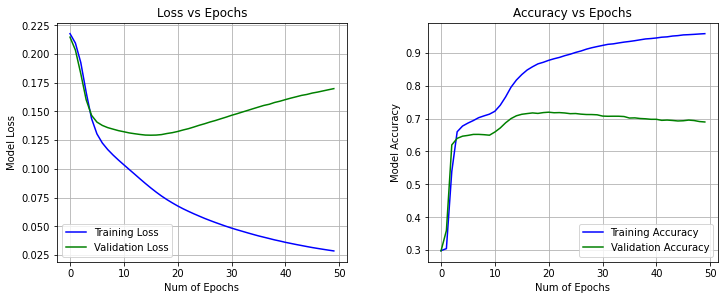


***************************************************************************************************************************
                                                     Grid Search: 5
***************************************************************************************************************************
TF-IDF Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: LeakyReLU(negative_slope=0.01) 
Hidden Layers: 1 
Hidden Dimensions: 150 
Learning Rate: 1e-05
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.21979,   Train F1 Score = 0.29847,   Validation Loss = 0.21938,   Validation F1 Score = 0.29723
Epoch   1:   Train Loss = 0.21890,   Train F1 Score = 0.29841,   Validation Loss = 0.21846,   Validation F1 Score = 0.29723
Epoch   2:   Train Loss = 0.21788,   Train F1 Score = 0.29819,   Validation Loss = 0.21736,   Validation F1 Sco

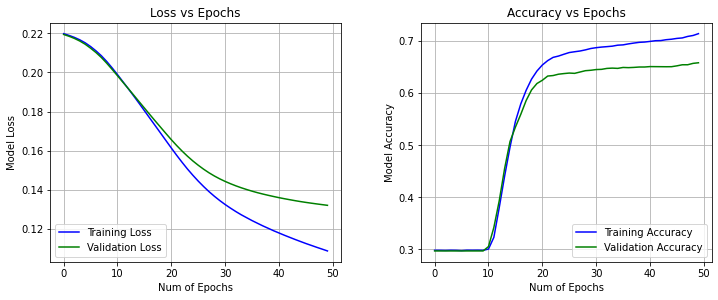


***************************************************************************************************************************
                                                     Grid Search: 6
***************************************************************************************************************************
TF-IDF Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: LeakyReLU(negative_slope=0.01) 
Hidden Layers: 1 
Hidden Dimensions: 150 
Learning Rate: 5e-05
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.22123,   Train F1 Score = 0.23354,   Validation Loss = 0.21842,   Validation F1 Score = 0.23318
Epoch   1:   Train Loss = 0.21359,   Train F1 Score = 0.37157,   Validation Loss = 0.20758,   Validation F1 Score = 0.62482
Epoch   2:   Train Loss = 0.19800,   Train F1 Score = 0.55592,   Validation Loss = 0.18949,   Validation F1 Sco

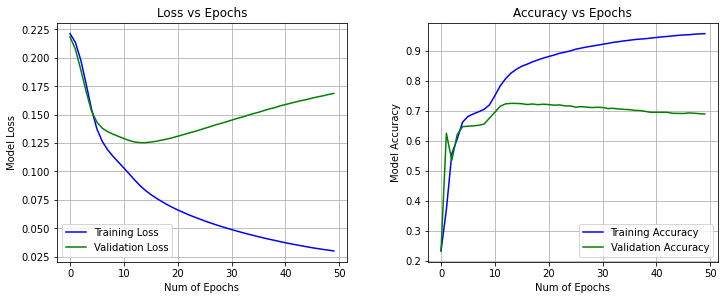


***************************************************************************************************************************
                                                     Grid Search: 7
***************************************************************************************************************************
TF-IDF Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: LeakyReLU(negative_slope=0.01) 
Hidden Layers: 1 
Hidden Dimensions: 200 
Learning Rate: 1e-05
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.22242,   Train F1 Score = 0.29809,   Validation Loss = 0.22184,   Validation F1 Score = 0.29723
Epoch   1:   Train Loss = 0.22121,   Train F1 Score = 0.29826,   Validation Loss = 0.22058,   Validation F1 Score = 0.29723
Epoch   2:   Train Loss = 0.21982,   Train F1 Score = 0.29830,   Validation Loss = 0.21907,   Validation F1 Sco

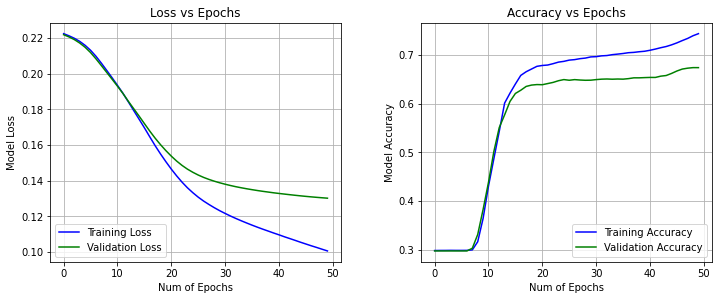


***************************************************************************************************************************
                                                     Grid Search: 8
***************************************************************************************************************************
TF-IDF Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: LeakyReLU(negative_slope=0.01) 
Hidden Layers: 1 
Hidden Dimensions: 200 
Learning Rate: 5e-05
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.21481,   Train F1 Score = 0.29806,   Validation Loss = 0.21147,   Validation F1 Score = 0.29723
Epoch   1:   Train Loss = 0.20502,   Train F1 Score = 0.29837,   Validation Loss = 0.19734,   Validation F1 Score = 0.29723
Epoch   2:   Train Loss = 0.18532,   Train F1 Score = 0.39829,   Validation Loss = 0.17589,   Validation F1 Sco

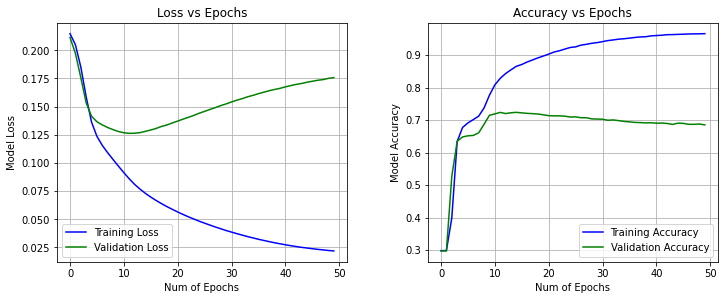

In [ ]:
vectorizers = ['TF-IDF']
activation_functions = [nn.ReLU(), nn.LeakyReLU()]
hidden_layers = [1]
loss_functions = [nn.MSELoss()]
optimizers = ['Adam']
hidden_dimensions = [150, 200]
learning_rates = [0.00001, 0.00005]

myGridSearch(vectorizers, activation_functions, hidden_layers, loss_functions, optimizers, hidden_dimensions, learning_rates, 0)

I tried lowering the units of hidden layers even more and with some minor changes in learning rate, we managed to slightly reduce overfitting and at the same time getting a good validation accuracy.


***************************************************************************************************************************
                                                     Grid Search: 1
***************************************************************************************************************************
TF-IDF Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 100 
Learning Rate: 2e-05
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.22071,   Train F1 Score = 0.23335,   Validation Loss = 0.22013,   Validation F1 Score = 0.23318
Epoch   1:   Train Loss = 0.21948,   Train F1 Score = 0.23341,   Validation Loss = 0.21879,   Validation F1 Score = 0.23318
Epoch   2:   Train Loss = 0.21792,   Train F1 Score = 0.23345,   Validation Loss = 0.21708,   Validation F1 Score = 0.23318
Epoch   3: 

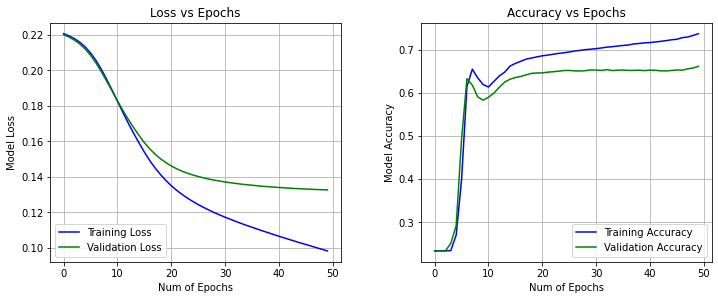


***************************************************************************************************************************
                                                     Grid Search: 2
***************************************************************************************************************************
TF-IDF Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 100 
Learning Rate: 3e-05
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Epoch   0:   Train Loss = 0.21642,   Train F1 Score = 0.29861,   Validation Loss = 0.21529,   Validation F1 Score = 0.29723
Epoch   1:   Train Loss = 0.21389,   Train F1 Score = 0.29821,   Validation Loss = 0.21250,   Validation F1 Score = 0.29723
Epoch   2:   Train Loss = 0.21065,   Train F1 Score = 0.29847,   Validation Loss = 0.20897,   Validation F1 Score = 0.29723
Epoch   3: 

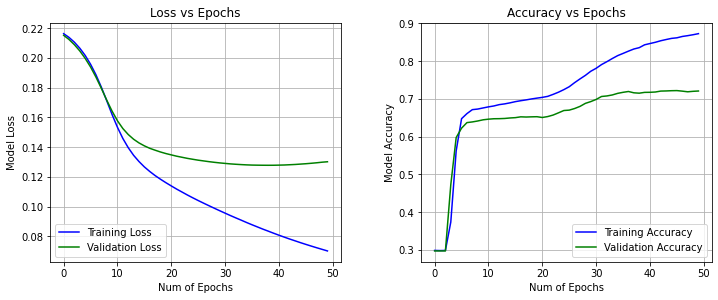

In [ ]:
vectorizers = ['TF-IDF']
activation_functions = [nn.ReLU()]
hidden_layers = [1]
loss_functions = [nn.MSELoss()]
optimizers = ['Adam']
hidden_dimensions = [100]
learning_rates = [0.00002, 0.00003]

myGridSearch(vectorizers, activation_functions, hidden_layers, loss_functions, optimizers, hidden_dimensions, learning_rates, 0)

#### Best model for TF-IDF


***************************************************************************************************************************
                                                     Grid Search: 1
***************************************************************************************************************************
TF-IDF Model 
Loss Function: MSELoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 100 
Learning Rate: 2e-05
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Train Precision Score = 0.86165
Train F1 Score = 0.85068
Train Recall Score = 0.85716
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Validation Precision Score = 0.73154
Validation F1 Score = 0.72118
Validation Recall Score = 0.72827




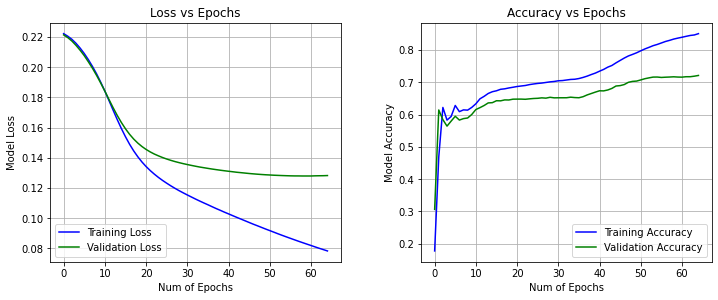

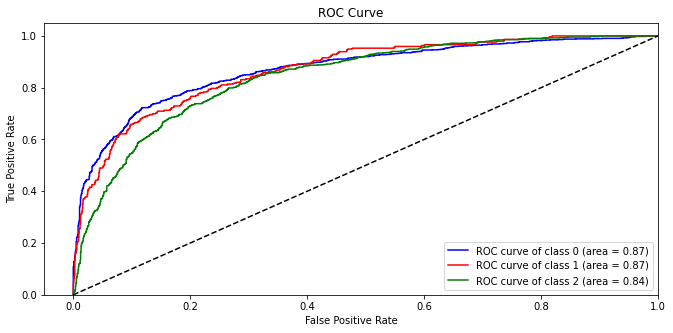

In [57]:
vectorizers = ['TF-IDF']
activation_functions = [nn.ReLU()]
hidden_layers = [1]
loss_functions = [nn.MSELoss()]
optimizers = ['Adam']
hidden_dimensions = [100]
learning_rates = [0.00002]

myGridSearch(vectorizers, activation_functions, hidden_layers, loss_functions, optimizers, hidden_dimensions, learning_rates, 1)

## Overall best model - GloVe

Both TF-IDF and GloVe model were good. However the model that uses GloVe can generalize better, while getting similar validation accuracies with TF-IDF.  


***************************************************************************************************************************
                                                     Grid Search: 1
***************************************************************************************************************************
Glove Model 
Loss Function: CrossEntropyLoss() 
Optimizer: <class 'torch.optim.adam.Adam'> 
Activation Function: ReLU() 
Hidden Layers: 1 
Hidden Dimensions: 100 
Learning Rate: 2.5e-05
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Train Precision Score = 0.73422
Train F1 Score = 0.72353
Train Recall Score = 0.73368
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Validation Precision Score = 0.70698
Validation F1 Score = 0.69458
Validation Recall Score = 0.70581




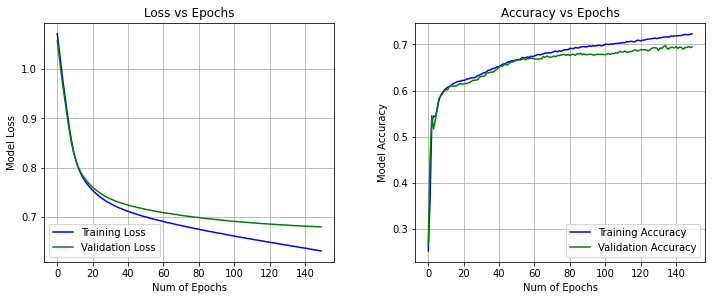

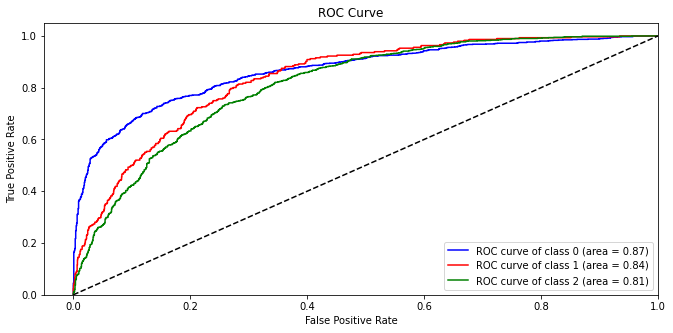

In [ ]:
vectorizers = ['Glove']
activation_functions = [nn.ReLU()]
hidden_layers = [1]
loss_functions = [nn.CrossEntropyLoss()]
optimizers = ['Adam']
hidden_dimensions = [100]
learning_rates = [0.000025]

myGridSearch(vectorizers, activation_functions, hidden_layers, loss_functions, optimizers, hidden_dimensions, learning_rates, 1)

## Test set section

### Training and testing

In [93]:
import torch
torch.manual_seed(0)

def train_model_and_test():

  train_losses, total_train_loses = [], []
  train_precision_scores, total_train_precision_scores = [], []
  train_f1_scores, total_train_f1_scores = [], []
  train_recall_scores, total_train_recall_scores = [], []
  train_acc, total_train_acc = [], []

  test_losses, total_test_loses = [], []
  test_precision_scores, total_test_precision_scores = [], []
  test_f1_scores, total_test_f1_scores = [], []
  test_recall_scores, total_test_recall_scores = [], []
  test_acc, total_test_acc = [], []

  test_predictions = np.empty((0, 3))

  # Parameters of best model
  input_dim = embedding_size
  output_dim = 3
  hidden_dim = 100
  learning_rate = 0.000025
  activation_func = nn.ReLU()
  loss_func = nn.CrossEntropyLoss()
  num_epochs = 150

  model = FeedForwardNeuralNet0(input_dim, hidden_dim, output_dim, activation_func, 1)  
  optim = torch.optim.Adam(model.parameters(), lr=learning_rate)

  print()
  print("Best Model - GloVe", "\nLoss Function:", loss_func, "\nOptimizer:", type (optim), "\nActivation Function:", activation_func, "\nHidden Layers: 1", "\nHidden Dimensions:", hidden_dim, "\nLearning Rate:", learning_rate)
  print()

  dataset_train = torch.utils.data.TensorDataset(X_train_tensor, Y_train_tensor)
  dataset_test = torch.utils.data.TensorDataset(X_test_tensor, Y_test_tensor)
  dataloader_train = torch.utils.data.DataLoader(dataset_train, batch_size=128, shuffle=True)
  dataloader_test = torch.utils.data.DataLoader(dataset_test, batch_size=128, shuffle=False)

  for epoch in range(num_epochs):
    train_losses, train_precision_scores, train_f1_scores, train_recall_scores, train_acc = [], [], [], [], []
    test_losses, test_precision_scores, test_f1_scores, test_recall_scores, test_acc = [], [], [], [], []

    # Train model
    for x_batch, y_batch in dataloader_train:
      y_pred = model(x_batch)

      # Calcualte loss of train data
      if isinstance(loss_func, torch.nn.modules.loss.CrossEntropyLoss) == True:
        loss = loss_func(y_pred, one_hot_reverse_matrix(y_batch).type(torch.LongTensor))
      else:
        loss = loss_func(y_pred, y_batch)
      train_losses.append(loss.item())

      optim.zero_grad() #Delete previously stored gradients
      loss.backward() #Perform backpropagation starting from the loss calculated in this epoch
      optim.step() #Update model's weights based on the gradients calculated during backprop

      # Reshape predicted and true labels
      # This convertion is necessary for the scoring functions
      y_pred = torch.argmax(y_pred, dim=1).numpy().reshape(-1,1)
      y_batch = torch.argmax(y_batch, dim=1).numpy().reshape(-1,1)
      
      # Calculate scores of train data

      score = precision_score(y_batch, y_pred, average='weighted', zero_division=1)
      train_precision_scores.append(score)
      
      score = f1_score(y_batch, y_pred, average='weighted', zero_division=1)
      train_f1_scores.append(score)
      
      score = recall_score(y_batch, y_pred, average='weighted', zero_division=1)
      train_recall_scores.append(score)

      acc = accuracy_score(y_batch, y_pred)
      train_acc.append(acc)

    # Validate model
    for x_batch, y_batch in dataloader_test:
      y_pred = model(x_batch)

      # Calculate loss of test data
      if isinstance(loss_func, torch.nn.modules.loss.CrossEntropyLoss) == True:
        loss = loss_func(y_pred, one_hot_reverse_matrix(y_batch).type(torch.LongTensor))
      else:
        loss = loss_func(y_pred, y_batch)
      test_losses.append(loss.item())

      if epoch == num_epochs - 1:
        test_predictions=np.concatenate((test_predictions,y_pred.detach().numpy()))

      y_pred = torch.argmax(y_pred, dim=1).numpy().reshape(-1,1)
      y_batch = torch.argmax(y_batch, dim=1).numpy().reshape(-1,1)

      # Calculate scores of test data

      score = precision_score(y_batch, y_pred, average='weighted', zero_division=1)
      test_precision_scores.append(score)
      
      score = f1_score(y_batch, y_pred, average='weighted', zero_division=1)
      test_f1_scores.append(score)
      
      score = recall_score(y_batch, y_pred, average='weighted', zero_division=1)
      test_recall_scores.append(score)

      acc = accuracy_score(y_batch, y_pred)
      test_acc.append(acc)
    
    # Add train scores to corresponding lists
    total_train_loses.append(sum(train_losses)/len(dataloader_train))
    total_train_precision_scores.append(sum(train_precision_scores)/len(dataloader_train))
    total_train_f1_scores.append(sum(train_f1_scores)/len(dataloader_train))
    total_train_recall_scores.append(sum(train_recall_scores)/len(dataloader_train))
    total_train_acc.append(sum(train_acc)/len(dataloader_train))

    # Add test scores to corresponding lists
    total_test_loses.append(sum(test_losses)/len(dataloader_test))
    total_test_precision_scores.append(sum(test_precision_scores)/len(dataloader_test))
    total_test_f1_scores.append(sum(test_f1_scores)/len(dataloader_test))
    total_test_recall_scores.append(sum(test_recall_scores)/len(dataloader_test))
    total_test_acc.append(sum(test_acc)/len(dataloader_test))

  print("Train Precision Score =", '{:.5}'.format(sum(train_precision_scores)/len(dataloader_train)))
  print("Train F1 Score =", '{:.5}'.format(sum(train_f1_scores)/len(dataloader_train)))
  print("Train Recall Score =", '{:.5}'.format(sum(train_recall_scores)/len(dataloader_train)))
  print()
  print("test Precision Score =", '{:.5}'.format(sum(test_precision_scores)/len(dataloader_test)))
  print("test F1 Score =", '{:.5}'.format(sum(test_f1_scores)/len(dataloader_test)))
  print("test Recall Score =", '{:.5}'.format(sum(test_recall_scores)/len(dataloader_test)))
  print()

  make_plots([i for i in range(num_epochs)], total_train_loses, total_train_f1_scores, total_test_loses, total_test_f1_scores)
  print("\n")
  make_roc_curve(test_predictions,Y_test_tensor.numpy())

### Reading data, printing results
<b>NOTE!</b> In order to run the cell below, firstly you have to do the following: 

1.   Upload your test set under the folder ```Vaccine Sentiment Dataset```.
3.   Change the path in the line ```test_set = pd.read_csv("./Vaccine Sentiment Dataset/vaccine_test_set.csv")```, if needed.

In [ ]:
# Read test set 
######## IMPORTANT: Give your path #########
test_set = pd.read_csv("./Vaccine Sentiment Dataset/vaccine_test_set.csv")

# Separate features (inputs) from targets (outputs)
X_test = test_set['tweet'] 
Y_test = test_set['label'].to_numpy().astype('int')

# Preprocess test set 
X_test = split_words_with_apostrophe(X_test)
X_test = text_preprocess(X_test)

In [ ]:
# Saving in tensors for test set (Glove Model)
test_size = X_test.shape[0] 
X_test_tensor = torch.empty(size=(test_size, embedding_size))
Y_test_tensor = torch.empty(size=(test_size, 3))
for i in range(test_size):
    X_test_tensor[i] = create_embedding_matrix(X_test[i],embedding_dict=glove_embedding,dimension=embedding_size)
for i in range(test_size):
    Y_test_tensor[i] = make_target(Y_test[i])

# Train and output results for test set
train_model_and_test()